In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import interpolate
from matplotlib.font_manager import FontProperties 

In [2]:
#检测一个文件夹下所有指定csv格式的文件并返回其路径
def file_search1(path):
    F = []
    for root, dirs, files in os.walk(path):
        #print root
        #print dirs
        for file in files:
            #print file.decode('gbk')    #文件名中有中文字符时转码
            if os.path.splitext(file)[1] == '.csv':
                t = os.path.splitext(file)[0]
#                 print(t)   #打印所有py格式的文件名
                F.append(t) #将所有的文件名添加到L列表中
    file_list=F
    filepath=path+'\\'
    filepath_list=[]
    for i in file_list:
        filepath_1=filepath+i+'.csv'
        filepath_list.append(filepath_1)
    return filepath_list
#修改path定位到文件夹路径，使用file_search1函数传入参数path，便可以返回该文件夹下所有的csv文件
# path=r"D:\桌面\小论文数据\论文数据测试\photon_2019-01-29_gt3l_t491_1658115571461"
path=r'E:\jupyter_workspace\20220727测试\论文20220810\东岛原始ICESat-2数据'
filepath_list=file_search1(path)
print(len(filepath_list))
index_1=int(input('请输入要处理文件夹中的第几个文件:'))
filename_111=filepath_list[index_1][-38:-4]
filepath_list[index_1][-38:-4]

1

2
请输入要处理文件夹中的第几个文件:1


1

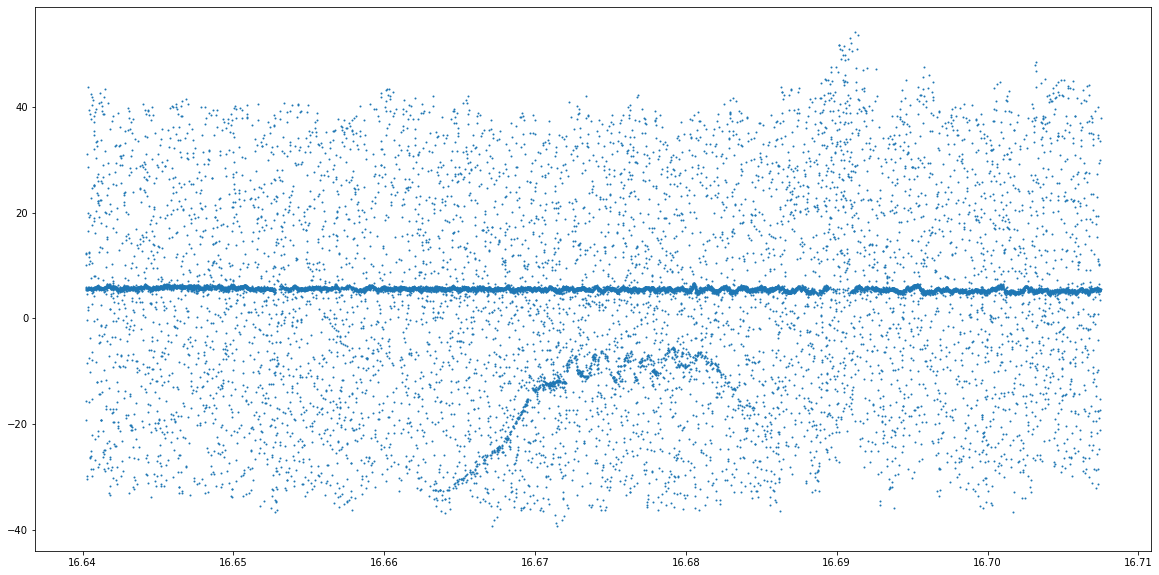

In [3]:
#修改filepath_list【】中的序号更改指定文件
data=pd.read_csv(filepath_list[index_1])
data =np.array(data)
data
plt.figure(figsize=(20,10))
plt.scatter(data[:,0],data[:,2],1)
plt.show()

In [4]:
data_new=[]
lat_min=float(input('纬度截断最小'))
lat_max=float(input('纬度截断最大'))
for i in data:
    if lat_min<i[0]<lat_max:
        data_new.append(i)
data=np.array(data_new)
16.662
16.685

纬度截断最小16.662
纬度截断最大16.685


16.685

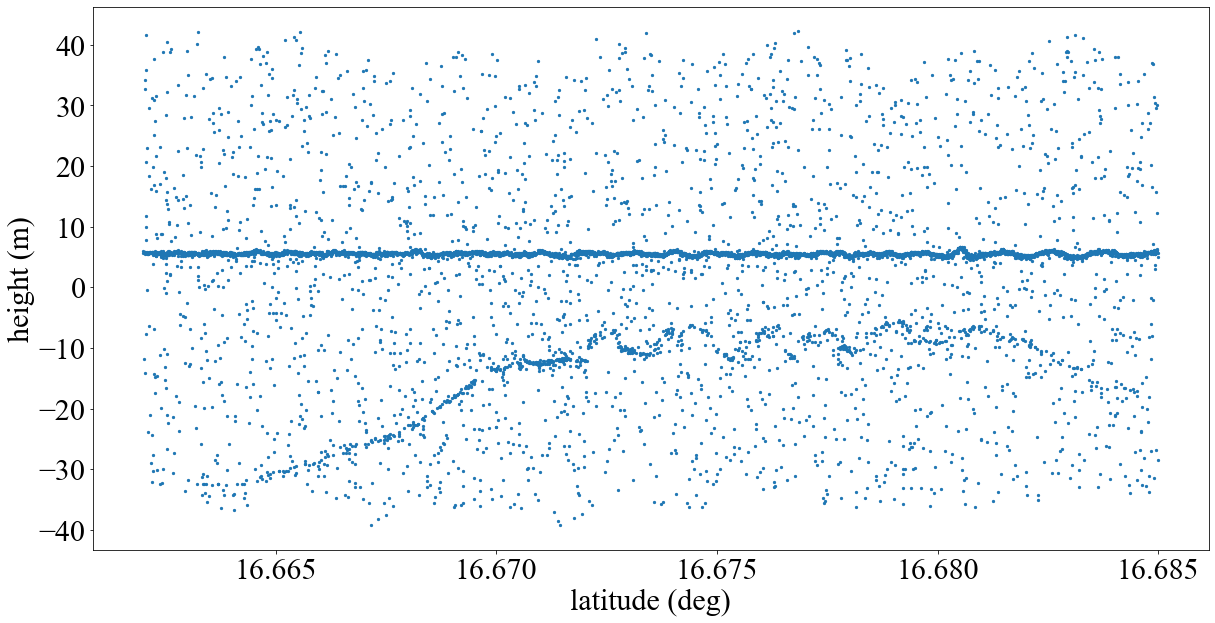

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(data[:,0],data[:,2],5)
plt.rcParams.update({'font.size':30})
plt.xlabel('latitude (deg)',fontsize=30,family='Times New Roman')
plt.ylabel('height (m)',fontsize=30,family='Times New Roman')
plt.xticks(fontsize=30,family='Times New Roman')
plt.yticks(fontsize=30,family='Times New Roman')
plt.show()

In [6]:
# plt.rcParams.keys() 

5.582679348000003


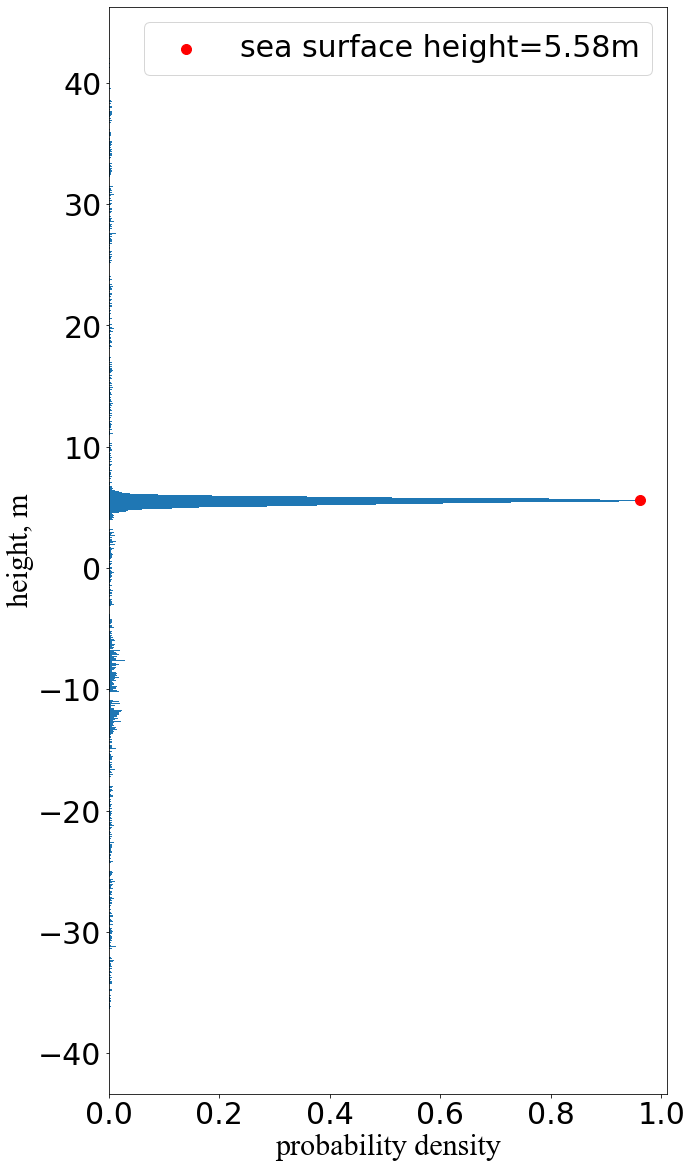

In [7]:
plt.figure(figsize=(10,20))
plt.rcParams.update({'font.size':30,'font.serif':'Times New Roman'})
m=plt.hist(data[:,2], bins=1000, rwidth=0.9, orientation= 'horizontal', density=True)
# plt.ylim(0,0.025)
# plt.xlim(50,60)
pro=list(m[0])
height=list(m[1])
pro_max_index=pro.index(np.max(m[0]))
sea_surface_height=(height[pro_max_index]+height[pro_max_index+1])/2
print(sea_surface_height)
plt.scatter(np.max(m[0]),sea_surface_height,100,'r')
plt.ylabel('height, m',family='Times New Roman')
plt.xlabel('probability density',family='Times New Roman')
plt.legend(['sea surface height='+str(round(sea_surface_height,2))+'m'])
plt.show()

5.582679348000003


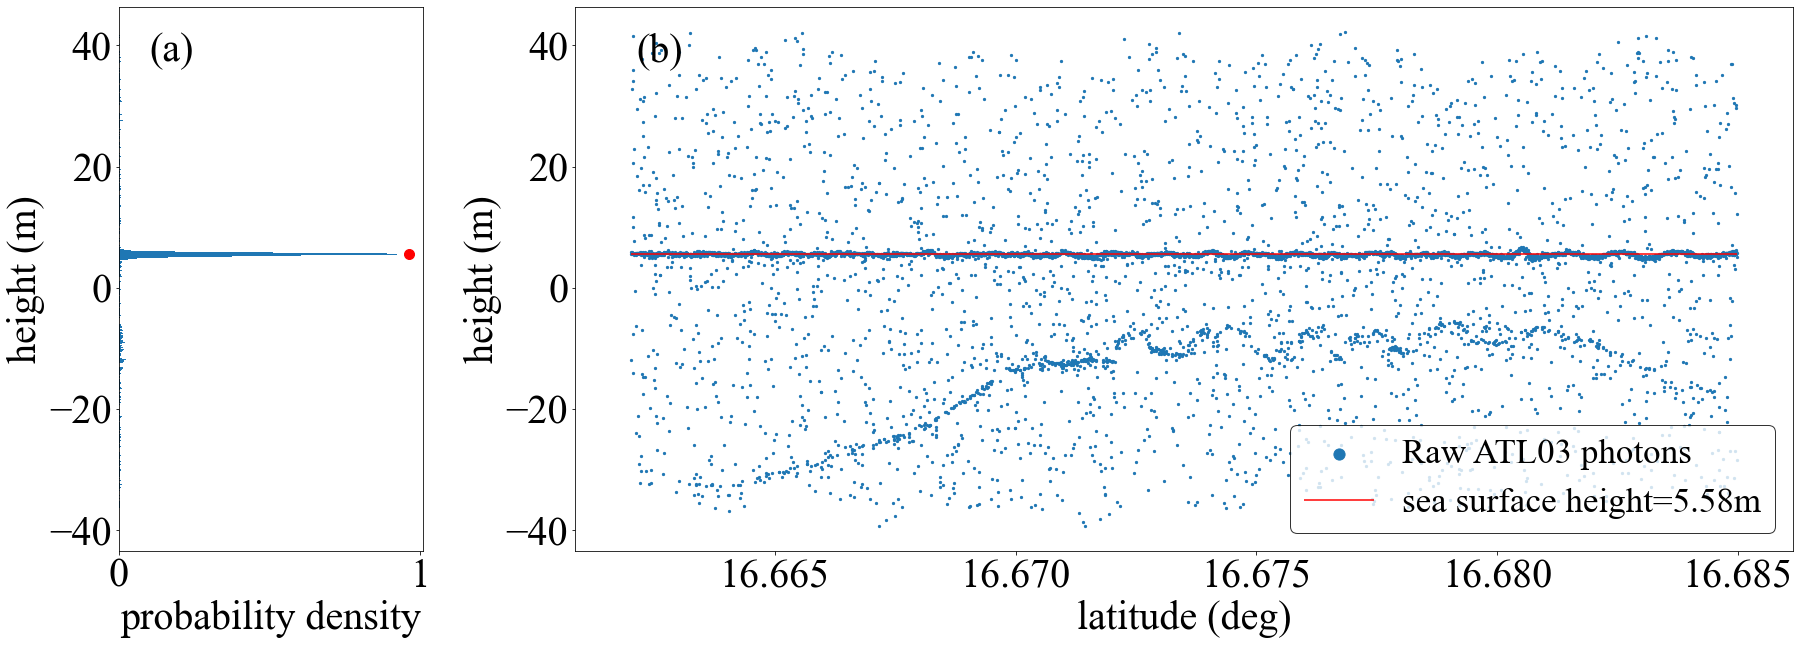

In [8]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 4])

fig = plt.figure(figsize=(30,10))

ax0 = fig.add_subplot(gs[0, 0])
m=plt.hist(data[:,2], bins=1000, rwidth=0.9, orientation= 'horizontal', density=True)
# plt.ylim(0,0.025)
# plt.xlim(50,60)
pro=list(m[0])
height=list(m[1])
pro_max_index=pro.index(np.max(m[0]))
sea_surface_height=(height[pro_max_index]+height[pro_max_index+1])/2
print(sea_surface_height)
ax0.scatter(np.max(m[0]),sea_surface_height,100,'r')
plt.ylabel('height (m)',family='Times New Roman',fontsize=40)
plt.xlabel('probability density',family='Times New Roman',fontsize=40)
# plt.legend(['sea surface height='+str(round(sea_surface_height,2))+'m'],fontsize=20)
plt.xticks(fontsize=40,family='Times New Roman')
plt.yticks(fontsize=40,family='Times New Roman')
ax=plt.gca()
fontdict={'size':40,'color':'k','family':'Times New Roman'}

plt.text(0.1,0.9,'(a)',fontdict=fontdict,transform=ax.transAxes)

# plt.subplot(122)

ax1 = fig.add_subplot(gs[0, 1])
ax1.scatter(data[:,0],data[:,2],5)
ax1.hlines(sea_surface_height,np.min(data[:,0]),np.max(data[:,0]),'r')
plt.rcParams.update({'font.size':40,'font.serif':'Times New Roman','font.sans-serif': ['Times New Roman']})
plt.xlabel('latitude (deg)',fontsize=40,family='Times New Roman')
plt.ylabel('height (m)',fontsize=40,family='Times New Roman')
plt.xticks(fontsize=40,family='Times New Roman')
plt.yticks(fontsize=40,family='Times New Roman')
plt.legend(['Raw ATL03 photons','sea surface height='+str(round(sea_surface_height,2))+'m'],fontsize=35,markerscale=5,edgecolor='black')
ax=plt.gca()
plt.text(0.05,0.9,'(b)',fontdict=fontdict,transform=ax.transAxes)
plt.show()

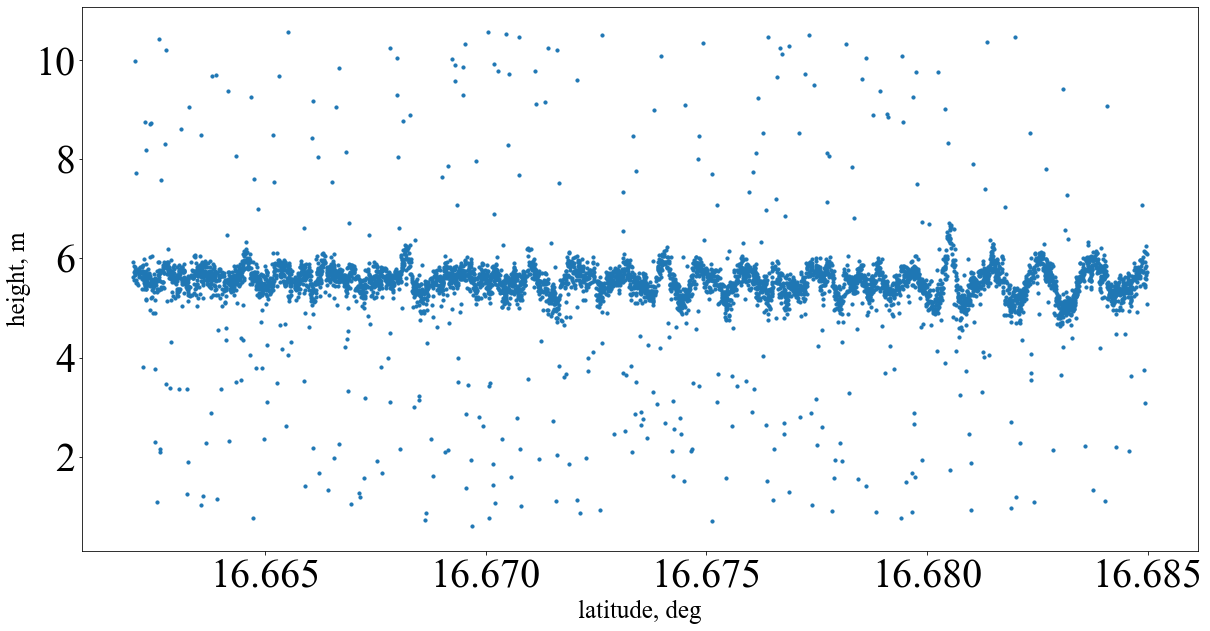

In [9]:
X_cu=[]
for i in data:
    if sea_surface_height-5<i[2]<sea_surface_height+5:
        X_cu.append(i)
X_cu=np.array(X_cu)

plt.figure(figsize=(20,10))
plt.scatter(X_cu[:,0],X_cu[:,2],10)
plt.xlabel('latitude, deg',fontsize=25,family='Times New Roman')
plt.ylabel('height, m',fontsize=25,family='Times New Roman')
plt.show()

5.655597397699999


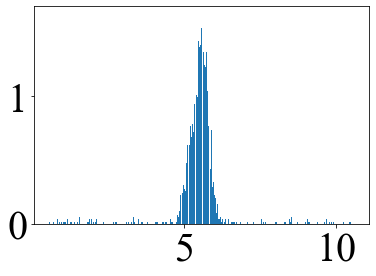

In [10]:
m=plt.hist(X_cu[:,2], bins=1000, rwidth=0.9, density=True)
pro=list(m[0])
height=list(m[1])
pro_max_index=pro.index(np.max(m[0]))
sea_surface_height=height[pro_max_index]
print(sea_surface_height)

In [11]:
def gaus_fit(m,sea_surface_height):
    from astropy.modeling import models, fitting
    import numpy as np
    import matplotlib.pyplot as plt
    
    def func_gaosi(x,a, miu, sigma):
        return a*np.exp(-(x-miu)**2/2/sigma**2)

    pro=m[0]#频次
    h_pro=m[1]#高程中心
    h_pro=h_pro[:pro.shape[0]]

    x = h_pro
    y = pro
    
    g_init = models.Gaussian1D(amplitude=2., mean=sea_surface_height, stddev=0.2)
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, x, y)
    
    print(g.amplitude.value,g.mean.value,g.stddev.value)
#     plt.figure(figsize=(5,10))
#     plt.scatter(x,y,10,'r',label='Raw')
#     plt.hist(X_cu[:,2], bins=1000, orientation='horizontal',rwidth=0.9, density=True,color='gray')
    plt.hist(X_cu[:,2], bins=1000, orientation='horizontal',rwidth=0.9, density=True)

    plt.plot(func_gaosi(x, g.amplitude.value,g.mean.value, g.stddev.value),x,'orange',label='Gauss fit',linewidth=5)
    
    g_list=[g.amplitude.value,g.mean.value, g.stddev.value]
    
    return g_list

1.3887248039615676 5.548050502903235 0.26513907828763705


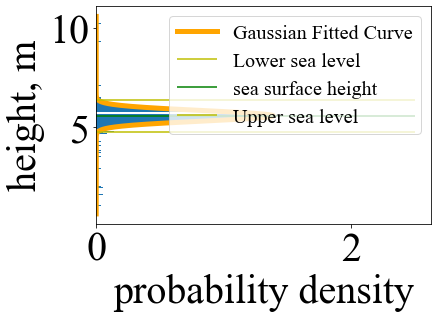

In [12]:
popt=gaus_fit(m,sea_surface_height)
# plt.vlines(popt[1],0,2.5,'g')
# plt.vlines(popt[1]-3*popt[2],0,2.5,'y')
# plt.vlines(popt[1]+3*popt[2],0,2.5,'y')
plt.hlines(popt[1]-3*popt[2],0,2.5,'y')
plt.hlines(popt[1],0,2.5,'g')
plt.hlines(popt[1]+3*popt[2],0,2.5,'y')
plt.ylabel('height, m',family='Times New Roman')
plt.xlabel('probability density',family='Times New Roman')
plt.legend(['Gaussian Fitted Curve','Lower sea level','sea surface height','Upper sea level'],fontsize=20)

plt.show()

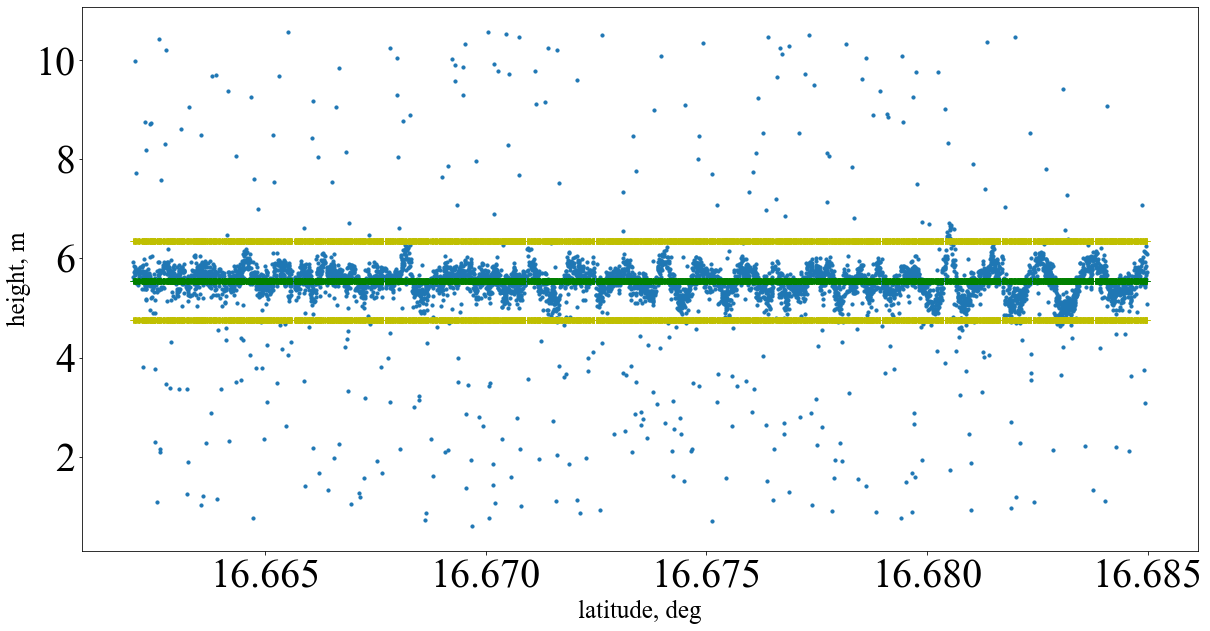

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(X_cu[:,0],X_cu[:,2],10)
x=X_cu[:,0]
y=x*0+popt[1]
y1=y+3*popt[2]
y2=y-3*popt[2]
plt.plot(x,y,'g+')
plt.plot(x,y1,'y+')
plt.plot(x,y2,'y+')
plt.xlabel('latitude, deg',fontsize=25,family='Times New Roman')
plt.ylabel('height, m',fontsize=25,family='Times New Roman')
# plt.ylim(53,58)
plt.show()

1.3887248039615676 5.548050502903235 0.26513907828763705


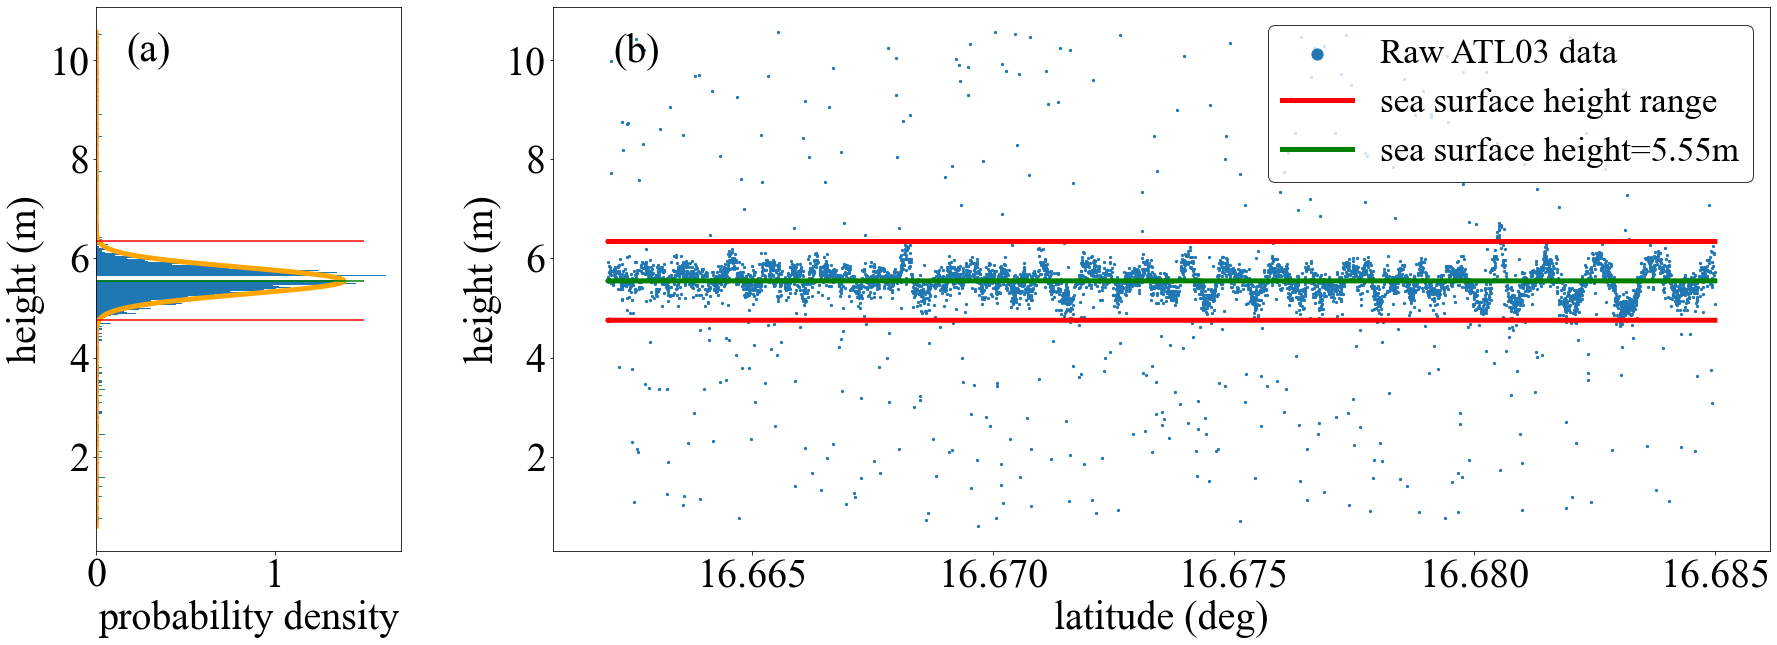

In [14]:
#制图：
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size':40,'font.serif':'Times New Roman','font.sans-serif': ['Times New Roman']})
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 4])
fig = plt.figure(figsize=(30,10))

ax0 = fig.add_subplot(gs[0, 0])
popt=gaus_fit(m,sea_surface_height)
# plt.vlines(popt[1],0,2.5,'g')
# plt.vlines(popt[1]-3*popt[2],0,2.5,'y')
# plt.vlines(popt[1]+3*popt[2],0,2.5,'y')
ax0.hlines(popt[1]-3*popt[2],0,1.5,'r')
ax0.hlines(popt[1],0,1.5,'g')
ax0.hlines(popt[1]+3*popt[2],0,1.5,'r')
plt.ylabel('height (m)',family='Times New Roman',fontsize=40)
plt.xlabel('probability density',family='Times New Roman',fontsize=40)
plt.xticks(fontsize=40,family='Times New Roman')
plt.yticks(fontsize=40,family='Times New Roman')
ax=plt.gca()
plt.text(0.1,0.9,'(a)',fontdict=fontdict,transform=ax.transAxes)
# plt.legend(['Gaussan fitted curve'],fontsize=25,loc=3)

ax1 = fig.add_subplot(gs[0, 1])
ax1.scatter(X_cu[:,0],X_cu[:,2],5)
x=X_cu[:,0]
y=x*0+popt[1]
y1=y+3*popt[2]
y2=y-3*popt[2]
ax1.plot(x,y1,'r',linewidth=5)
ax1.plot(x,y,'g',linewidth=5)
ax1.plot(x,y2,'r',linewidth=5)
plt.xlabel('latitude (deg)',fontsize=40,family='Times New Roman')
plt.ylabel('height (m)',fontsize=40,family='Times New Roman')
plt.xticks(fontsize=40,family='Times New Roman')
plt.yticks(fontsize=40,family='Times New Roman')
plt.legend(['Raw ATL03 data','sea surface height range','sea surface height='+str(round(popt[1],2))+'m'],fontsize=35,markerscale=5,edgecolor='black')
ax=plt.gca()
plt.text(0.05,0.9,'(b)',fontdict=fontdict,transform=ax.transAxes)
# plt.ylim(53,58)
plt.show()

1.3887248039615676 5.548050502903235 0.26513907828763705


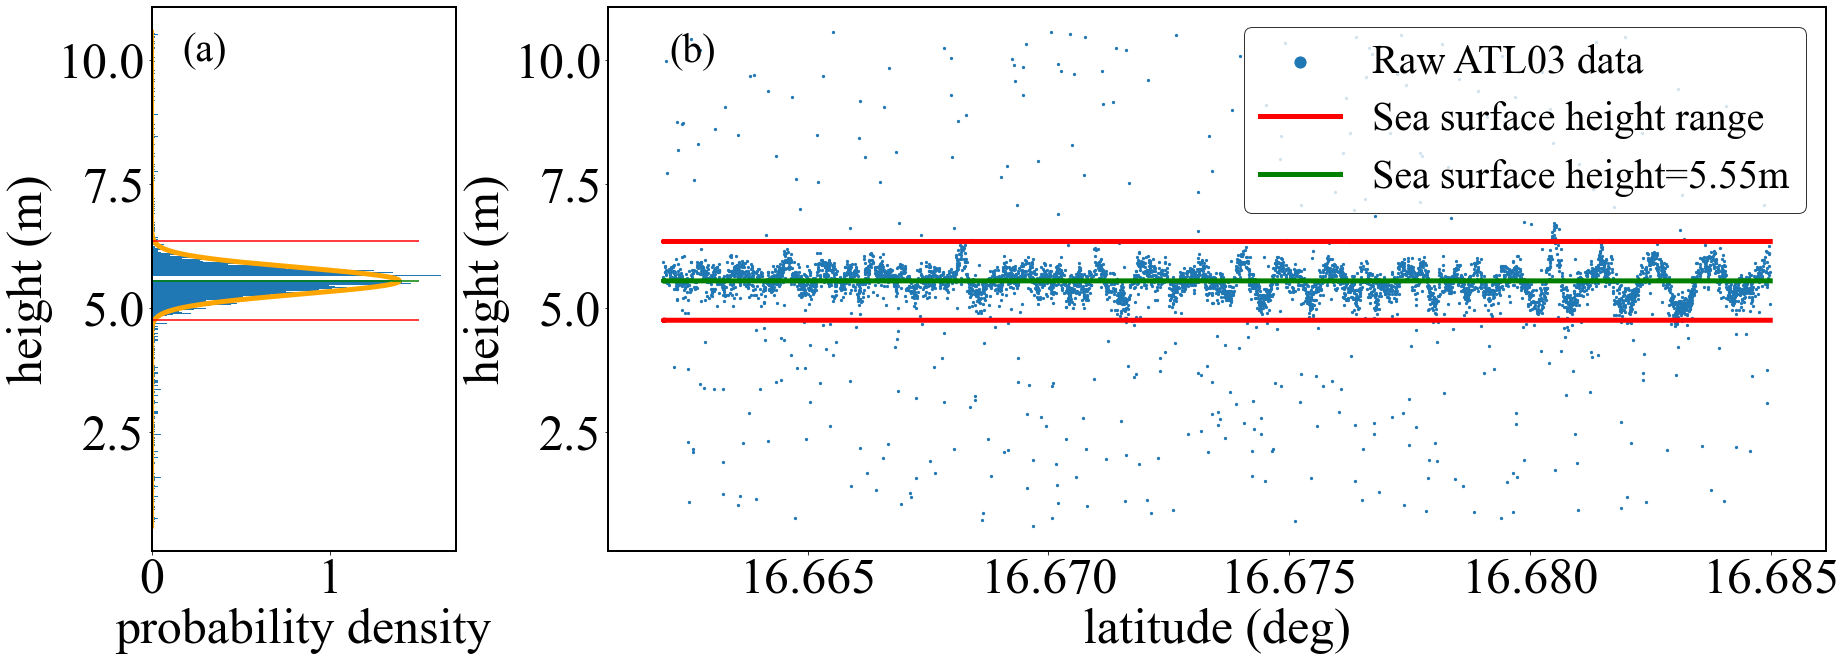

In [15]:
#制图：
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size':50,'font.serif':'Times New Roman','font.sans-serif': ['Times New Roman']})
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 4])
fig = plt.figure(figsize=(30,10),constrained_layout=False)

ax0 = fig.add_subplot(gs[0, 0])
popt=gaus_fit(m,sea_surface_height)
ax0.hlines(popt[1]-3*popt[2],0,1.5,'r')
ax0.hlines(popt[1],0,1.5,'g')
ax0.hlines(popt[1]+3*popt[2],0,1.5,'r')
plt.ylabel('height (m)',family='Times New Roman')
plt.xlabel('probability density',family='Times New Roman')
# plt.xticks(fontsize=40,family='Times New Roman')
# plt.yticks(fontsize=40,family='Times New Roman')
ax=plt.gca()
cu=2
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['bottom'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)

plt.text(0.1,0.9,'(a)',fontdict=fontdict,transform=ax.transAxes)
# plt.legend(['Gaussan fitted curve'],fontsize=25,loc=3)

ax1 = fig.add_subplot(gs[0, 1])
ax1.scatter(X_cu[:,0],X_cu[:,2],5)
x=X_cu[:,0]
y=x*0+popt[1]
y1=y+3*popt[2]
y2=y-3*popt[2]
ax1.spines['left'].set_linewidth(cu)
ax1.spines['right'].set_linewidth(cu)
ax1.spines['bottom'].set_linewidth(cu)
ax1.spines['top'].set_linewidth(cu)

ax1.plot(x,y1,'r',linewidth=5)
ax1.plot(x,y,'g',linewidth=5)
ax1.plot(x,y2,'r',linewidth=5)
plt.xlabel('latitude (deg)')
plt.ylabel('height (m)')
# plt.xticks(fontsize=40,family='Times New Roman')
# plt.yticks(fontsize=40,family='Times New Roman')
plt.legend(['Raw ATL03 data','Sea surface height range','Sea surface height='+str(round(popt[1],2))+'m'],fontsize=40,markerscale=5,loc='upper right',edgecolor='black')
ax=plt.gca()
plt.text(0.05,0.9,'(b)',fontdict=fontdict,transform=ax.transAxes)
plt.tick_params
plt.savefig(r'E:\jupyter_workspace\20220727测试\20220830\20220826代码\20220831插图\东岛海面拟合.tiff', dpi=300, bbox_inches='tight')

# plt.ylim(53,58)
plt.show()

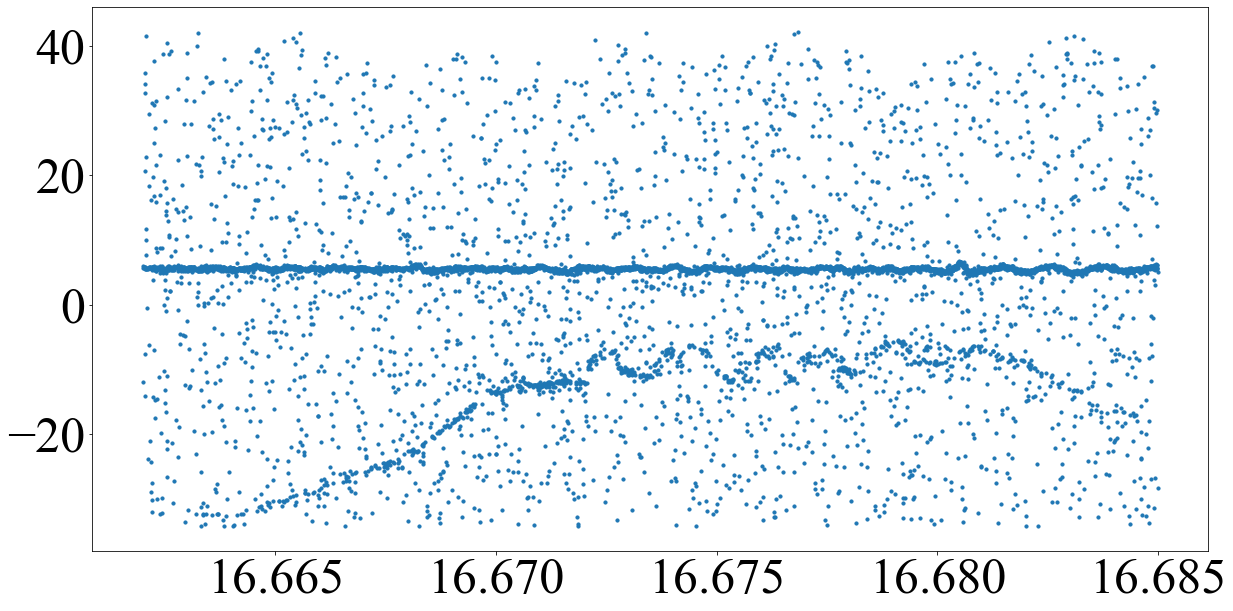

In [16]:
# #将海面50米以下和海面10米以上的区域当作粗去噪结果
# data_cu=[]
# for i in data:
#     if sea_surface_height-40<i[2]<sea_surface_height+5:
#         data_cu.append(i)
# data_cu=np.array(data_cu)

# plt.figure(figsize=(20,10))
# plt.scatter(data_cu[:,0],data_cu[:,2],10)
# plt.show()

#将海面50米以下和海面10米以上的区域当作粗去噪结果
data_cu=[]
for i in data:
    if sea_surface_height-40<i[2]:
        data_cu.append(i)
data_cu=np.array(data_cu)

plt.figure(figsize=(20,10))
plt.scatter(data_cu[:,0],data_cu[:,2],10)
plt.show()

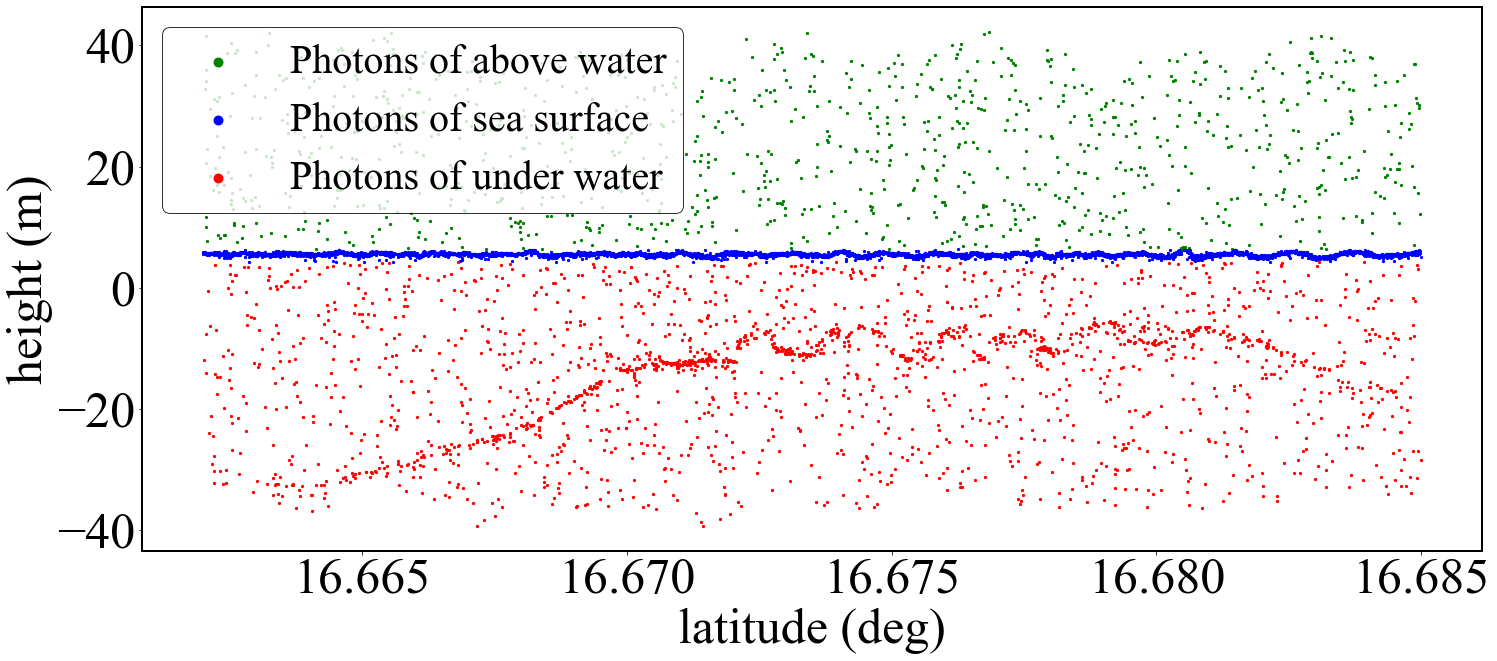

In [17]:
data_shuishang=[]
data_shuimian=[]
data_shuixia=[]
for i in data:
    if popt[1]-5*popt[2]<i[2]<popt[1]+3*popt[2]:
        data_shuimian.append(i)
    elif i[2]<popt[1]-5*popt[2]:
        data_shuixia.append(i)
    elif i[2]>popt[1]+3*popt[2]:
        data_shuishang.append(i)
data_shuimian=np.array(data_shuimian)
data_shuishang=np.array(data_shuishang)
data_shuixia=np.array(data_shuixia)

plt.rcParams.update({'font.size':50,'font.serif':'Times New Roman','font.sans-serif': ['Times New Roman']})
plt.figure(figsize=(24,10),edgecolor='black')
ax=plt.gca()

cu=2
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['bottom'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)

plt.scatter(data_shuishang[:,0],data_shuishang[:,2],5,'g')
plt.scatter(data_shuimian[:,0],data_shuimian[:,2],5,'b')
plt.scatter(data_shuixia[:,0],data_shuixia[:,2],5,'r')
plt.legend(['Photons of above water','Photons of sea surface','Photons of under water'],fontsize=40,markerscale=4,edgecolor='black')
plt.xlabel('latitude (deg)')
plt.ylabel('height (m)')

# # 设置坐标轴刻度值显示间隔，对应的修改数字即可
# x_major_locator=plt.MultipleLocator(1)
# y_major_locator=plt.MultipleLocator(1)
 
# # ax为两条坐标轴的实例，这块代码不用管
# ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)

# plt.xticks(fontsize=32,family='Times New Roman')
# plt.yticks(fontsize=32,family='Times New Roman')
plt.show()

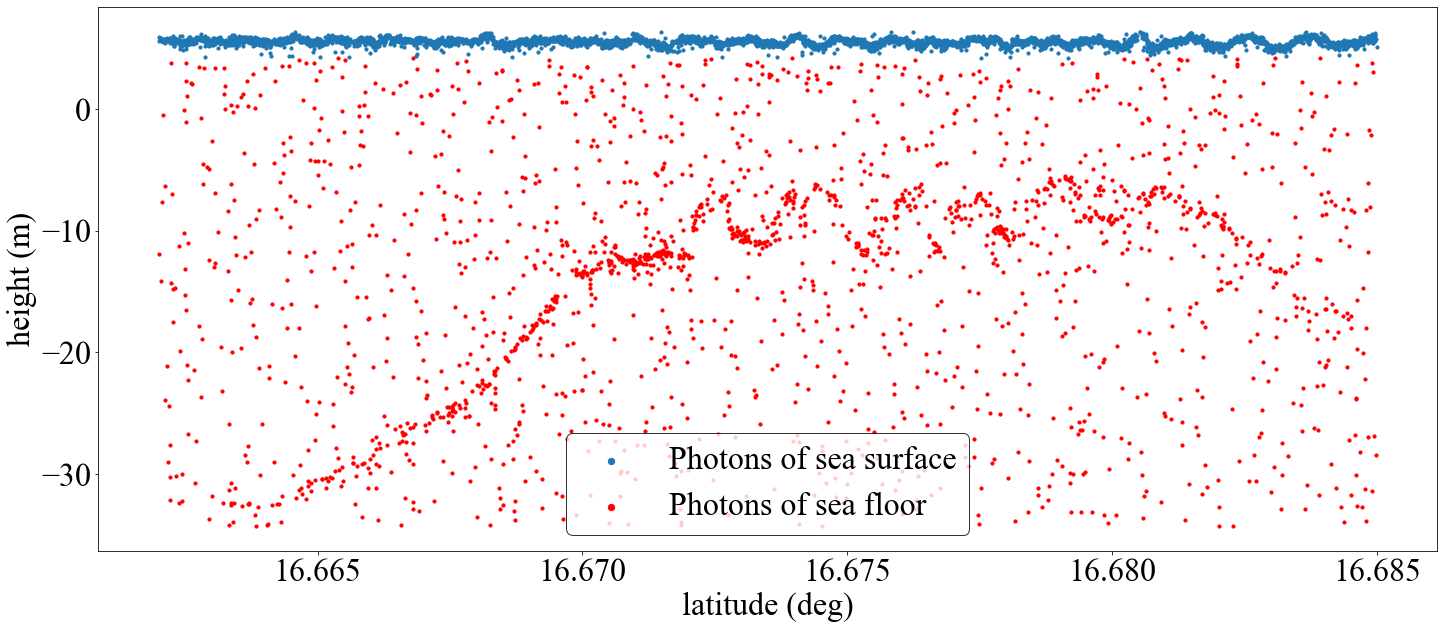

In [18]:
data_shuishang=[]
data_shuimian=[]
data_shuixia=[]
for i in data_cu:
    if popt[1]-5*popt[2]<i[2]<popt[1]+3*popt[2]:
        data_shuimian.append(i)
    elif i[2]<popt[1]-5*popt[2]:
        data_shuixia.append(i)
    elif i[2]>popt[1]+3*popt[2]:
        data_shuishang.append(i)
data_shuimian=np.array(data_shuimian)
data_shuishang=np.array(data_shuishang)
data_shuixia=np.array(data_shuixia)

plt.figure(figsize=(24,10))
# plt.scatter(data_shuishang[:,0],data_shuishang[:,2],10)
plt.scatter(data_shuimian[:,0],data_shuimian[:,2],10)
plt.scatter(data_shuixia[:,0],data_shuixia[:,2],10,'r')
plt.legend(['Photons of sea surface','Photons of sea floor'],fontsize=32,markerscale=2,edgecolor='black')
plt.xlabel('latitude (deg)',fontsize=32,family='Times New Roman')
plt.ylabel('height (m)',fontsize=32,family='Times New Roman')
plt.xticks(fontsize=32,family='Times New Roman')
plt.yticks(fontsize=32,family='Times New Roman')
plt.show()

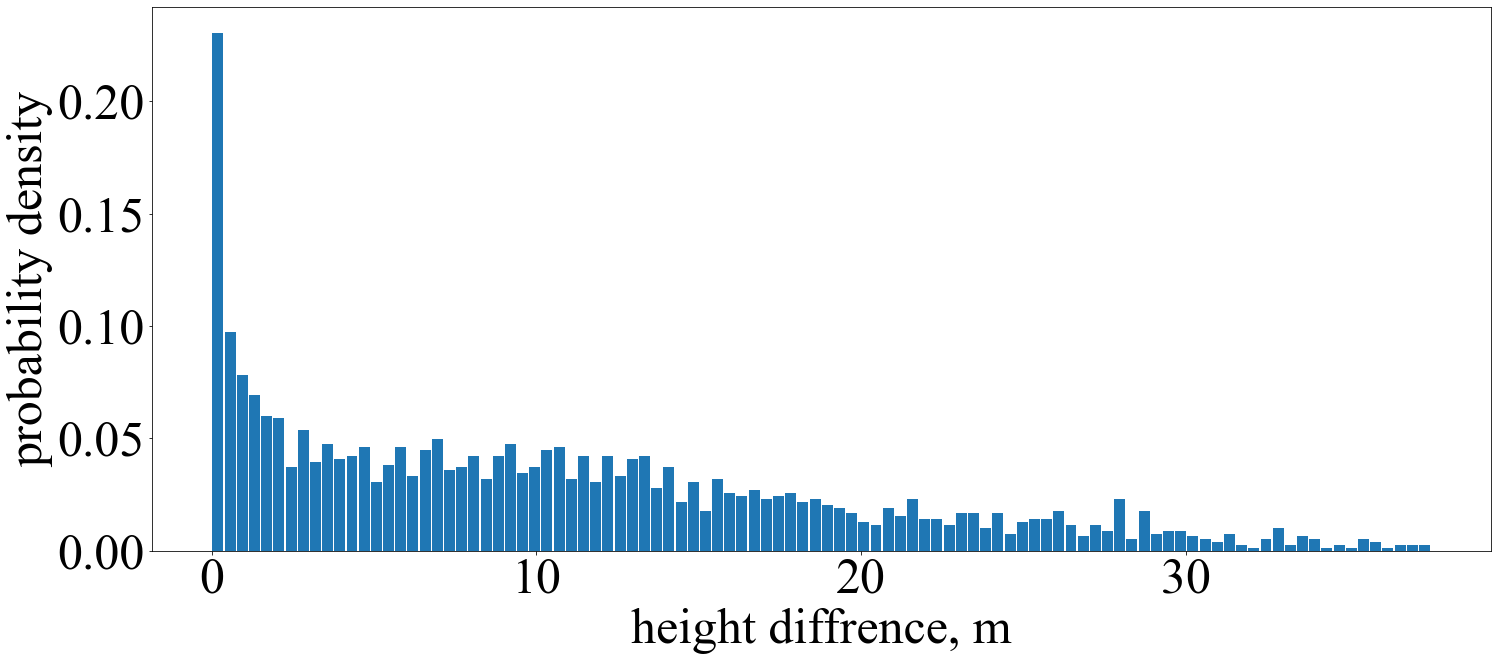

In [19]:
shuixia_1=[]
for i in range(data_shuixia.shape[0]-1):
    a=abs(data_shuixia[i+1,2]-data_shuixia[i,2])
    shuixia_1.append(a)
plt.figure(figsize=(24, 10))
n_shuixia1=plt.hist(shuixia_1,bins=100,rwidth=0.9, density=True)
plt.xlabel('height diffrence, m')
plt.ylabel('probability density')
plt.show()

In [20]:
# np.sum(n_shuixia1[0]* np.diff(n_shuixia1[1]))
# np.diff(n_shuixia1[1])
# pro=n_shuixia1[0]*np.diff(n_shuixia1[1])
# h_cha=np.array(n_shuixia1[1])
# h_cha=h_cha[:pro.shape[0]]
# plt.figure(figsize=(20,10))
# plt.scatter(h_cha,pro,10)
# plt.plot(h_cha,pro,'r')
# plt.vlines(3,0,0.1)
# plt.show()

[0.06940527 1.26702886 0.00816728]
1.5021968399999985


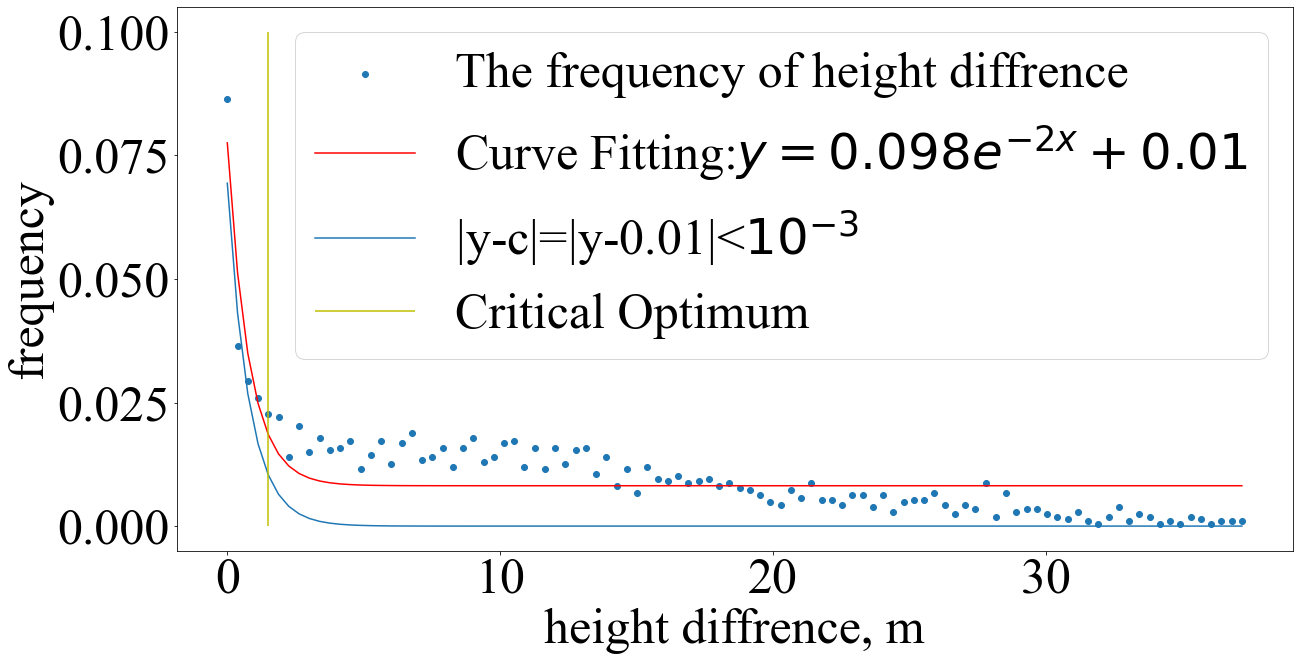

In [21]:
# for i in range(len(pro)-1):
#     print(abs(pro[i+1]-pro[i]))
# 定义xy之间的映射函数
def func(x, a, b, c):
    return a * np.exp(-b*x) + c
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

pro=n_shuixia1[0]*np.diff(n_shuixia1[1])
h_cha=np.array(n_shuixia1[1])
h_cha=h_cha[:pro.shape[0]]
# 声明待拟合的数据
xdata = h_cha
ydata = pro

# 展示数据
plt.figure(figsize=(20,10))
# n_shuixia1=plt.hist(shuixia_1,bins=100,rwidth=0.9, density=True)

plt.scatter(xdata, ydata, label='data')
# 拟合数据并展示曲线
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt)-popt[2])
print(popt)

# print(func(xdata, *popt)-popt[2])
y2=func(xdata, *popt)-popt[2]
for i in range(len(y2)-1):
    if abs(y2[i]-0)>1e-2:
#         print(xdata[i])
        bb=xdata[i]
print(bb)
plt.vlines(bb,0,0.1,'y')    
plt.xlabel('height diffrence, m')
plt.ylabel('frequency')
plt.legend(['The frequency of height diffrence','Curve Fitting:$y=0.098e^{-2x}+0.01$','|y-c|=|y-0.01|<$10^{-3}$','Critical Optimum'])
plt.show()

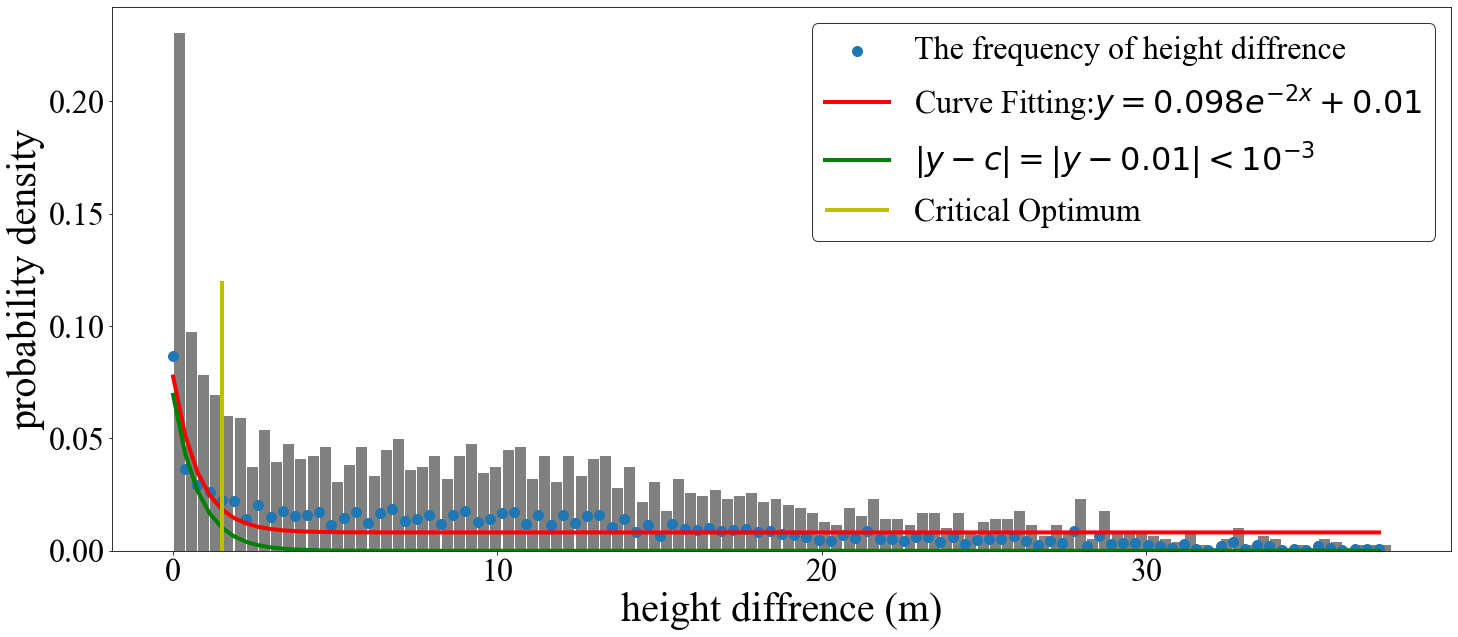

In [22]:
#绘图
plt.figure(figsize=(24, 10))
n_shuixia1=plt.hist(shuixia_1,bins=100,rwidth=0.9,density=True,color='gray')
plt.xlabel('height diffrence (m)',fontsize=40)
plt.ylabel('probability density',fontsize=40)
plt.scatter(xdata, ydata, 100)

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt),linewidth=4)
plt.plot(xdata, func(xdata, *popt)-popt[2],linewidth=4,color='g')
plt.vlines(bb,0,0.12,'y',linewidth=4)    
plt.legend(['The frequency of height diffrence','Curve Fitting:$y=0.098e^{-2x}+0.01$','$|y-c|=|y-0.01|<10^{-3}$','Critical Optimum'],fontsize=32,markerscale=1,edgecolor='black')
plt.xticks(fontsize=32,family='Times New Roman')
plt.yticks(fontsize=32,family='Times New Roman')

plt.show()

1.5021968399999985


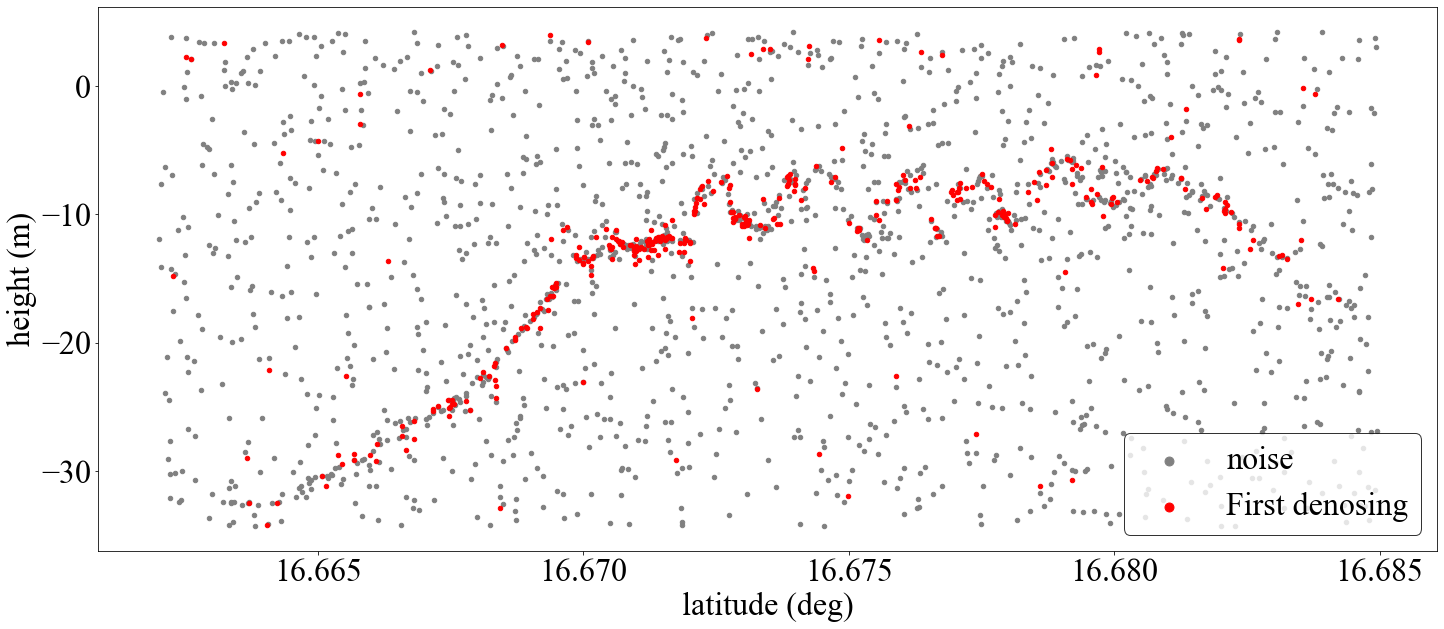

(1710, 4) (371, 4)


In [23]:
# a=0.0
# for i in range(len(pro)-1):
#     if a <0.55:
#         a+=pro[i]
# #         print(pro[i])
#         b=n_shuixia1[1][i]
# print(a,b)
yuzhi1=bb
print(yuzhi1)
shuixia_quzao=[]
shuixia_zaosheng1=[]
for i in range(data_shuixia.shape[0]-1):
    if abs(data_shuixia[i+1,2]-data_shuixia[i,2])<yuzhi1:
        shuixia_quzao.append(data_shuixia[i])
    else:
        shuixia_zaosheng1.append(data_shuixia[i])
shuixia_quzao=np.array(shuixia_quzao)
shuixia_zaosheng1=np.array(shuixia_zaosheng1)
shuixia_zaosheng1.shape
plt.figure(figsize=(24, 10))

plt.scatter(shuixia_zaosheng1[:,0],shuixia_zaosheng1[:,2],20,'gray')
plt.scatter(shuixia_quzao[:,0],shuixia_quzao[:,2],20,'r')
plt.xlabel('latitude (deg)',fontsize=32,family='Times New Roman')
plt.ylabel('height (m)',fontsize=32,family='Times New Roman')
plt.xticks(fontsize=32,family='Times New Roman')
plt.yticks(fontsize=32,family='Times New Roman')
plt.legend(['noise','First denosing'],fontsize=32,markerscale=2,edgecolor='black')
# plt.scatter(shuixia_zaosheng1[:,0],shuixia_zaosheng1[:,2],10)
plt.show()
print(shuixia_zaosheng1.shape,shuixia_quzao.shape)

In [24]:
# pro1=np.array(n_shuixia1[0])
# h_cha=np.array(n_shuixia1[1])
# h_cha=h_cha[:pro1.shape[0]]
# plt.scatter(h_cha,pro1,10)
# h_cha_list=[]
# for i in range(len(pro1)-1):
#     if pro1[i]-pro1[i+1]<0:
#         h_cha_list.append(h_cha[i])
# #         print(h_cha[i])

# yuzhi1=h_cha_list[0]
# h_cha_list[0]

In [25]:
# list0=[]
# for i in range(len(n_shuixia1[0])):
#     if n_shuixia1[1][i]<1:
# #         print(n_shuixia1[0][i])
# #         print(n_shuixia1[1][i])
#         list0.append(n_shuixia1[1][i])


# yuzhi1=list0[-1]
# list0[-1]

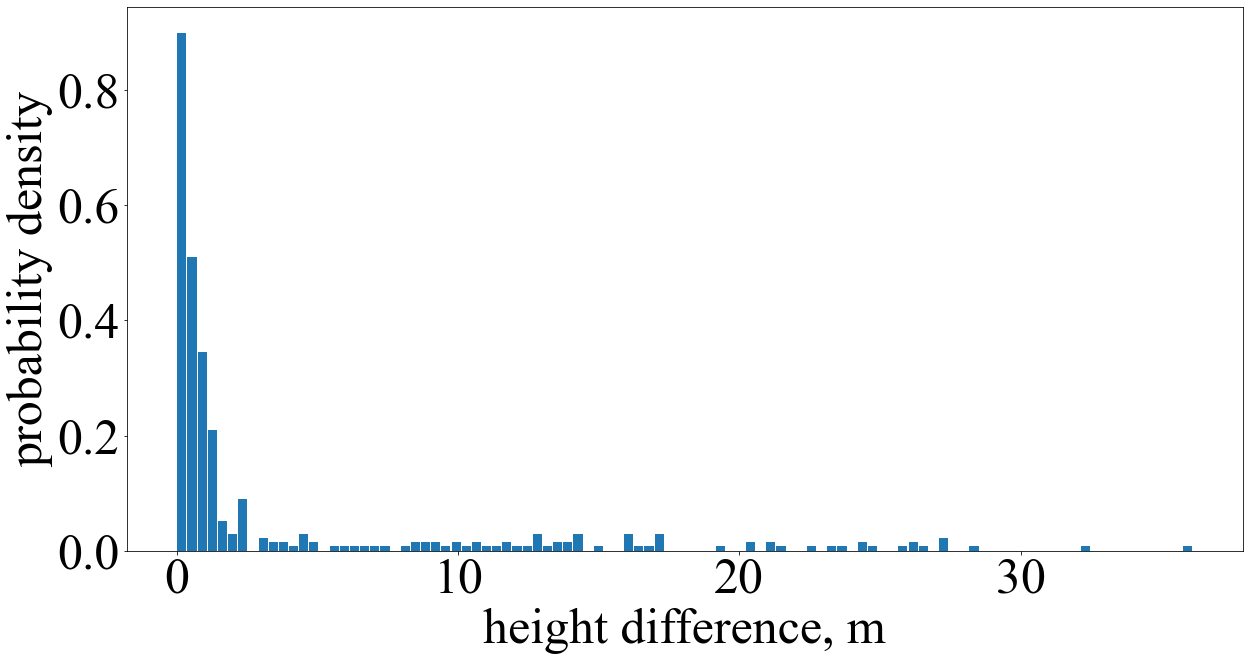

In [26]:
shuixia_2=[]
for i in range(shuixia_quzao.shape[0]-1):
    a=abs(shuixia_quzao[i+1,2]-shuixia_quzao[i,2])
    shuixia_2.append(a)
plt.figure(figsize=(20, 10))
n_shuixia2=plt.hist(shuixia_2,bins=100,rwidth=0.9, density=True)
plt.xlabel('height difference, m')
plt.ylabel('probability density')
plt.show()

In [27]:
# pro=n_shuixia2[0]*np.diff(n_shuixia2[1])
# h_cha=np.array(n_shuixia2[1])
# h_cha=h_cha[:pro.shape[0]]
# plt.figure(figsize=(20,10))
# plt.scatter(h_cha,pro,10)
# plt.plot(h_cha,pro,'r')
# plt.vlines(1.7028650199999977,0,0.1)
# plt.show()

[0.32609557 1.49636639 0.00228434]


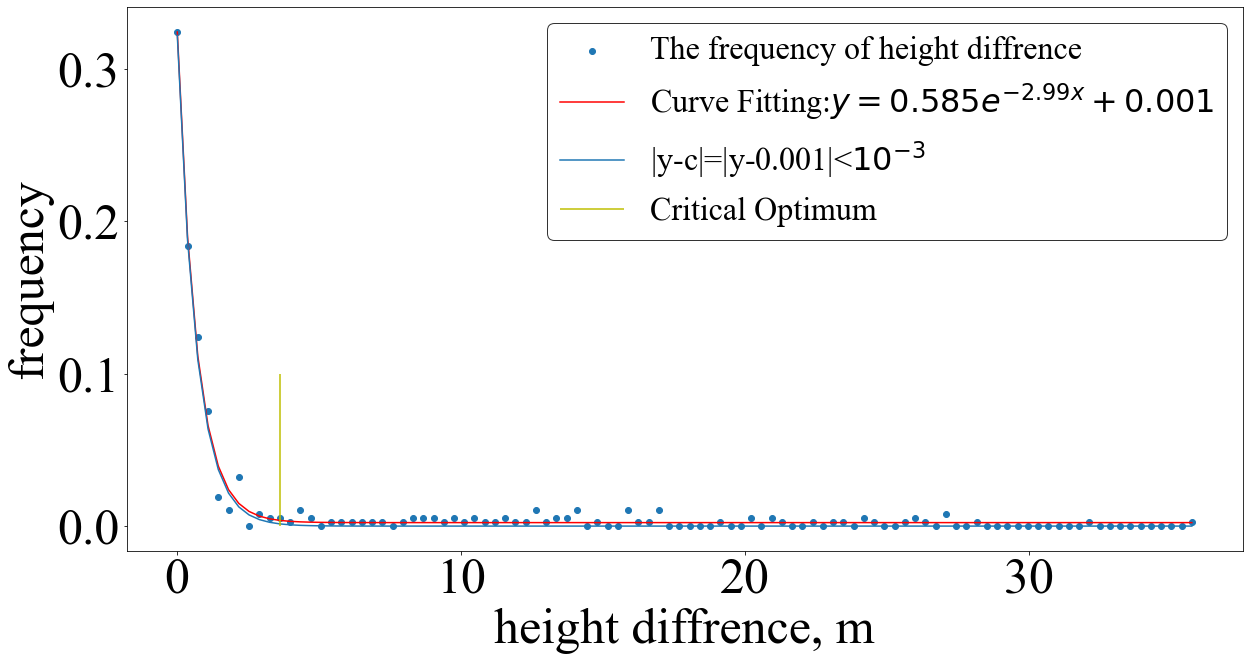

In [28]:
# for i in range(len(pro)-1):
#     print(abs(pro[i+1]-pro[i]))
# 定义xy之间的映射函数
def func(x, a, b, c):
    return a * np.exp(-b*x) + c
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

pro=n_shuixia2[0]*np.diff(n_shuixia2[1])
h_cha=np.array(n_shuixia2[1])
h_cha=h_cha[:pro.shape[0]]
# 声明待拟合的数据
xdata = h_cha
ydata = pro

# 展示数据
plt.figure(figsize=(20,10))
# n_shuixia2=plt.hist(shuixia_2,bins=100,rwidth=0.9, density=True)

plt.scatter(xdata, ydata, label='data')
# 拟合数据并展示曲线
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt)-popt[2])
print(popt)

# print(func(xdata, *popt)-popt[2])
y2=func(xdata, *popt)-popt[2]
for i in range(len(y2)-1):
    if abs(y2[i]-0)>1e-3:
#         print(xdata[i])
        bb=xdata[i]
plt.vlines(bb,0,0.1,'y')         
plt.xlabel('height diffrence, m')
plt.ylabel('frequency')
plt.legend(['The frequency of height diffrence','Curve Fitting:$y=0.585e^{-2.99x}+0.001$','|y-c|=|y-0.001|<$10^{-3}$','Critical Optimum'],fontsize=32,markerscale=1,edgecolor='black')
plt.show()

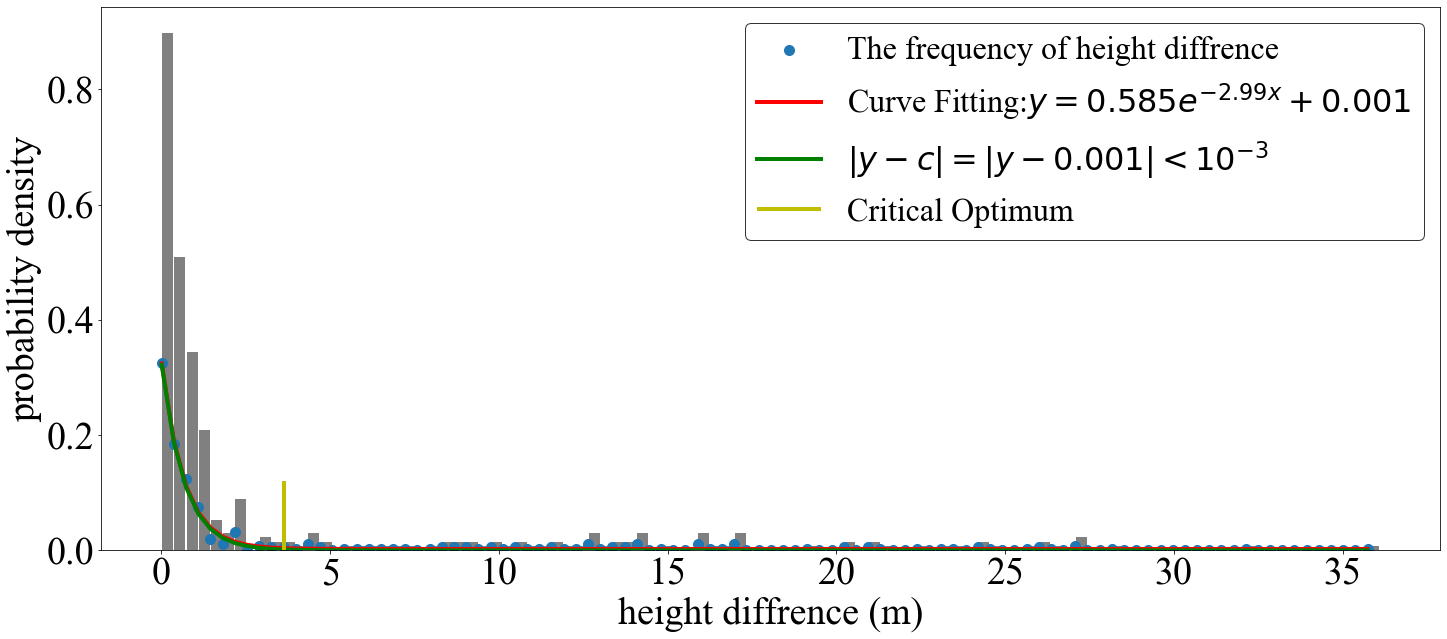

In [29]:
#绘图
plt.figure(figsize=(24, 10))
n_shuixia1=plt.hist(shuixia_2,bins=100,rwidth=0.9,density=True,color='gray')
plt.xlabel('height diffrence (m)',fontsize=38)
plt.ylabel('probability density',fontsize=38)
plt.scatter(xdata, ydata, 100)

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt),linewidth=4)
plt.plot(xdata, func(xdata, *popt)-popt[2],linewidth=4,color='g')
plt.vlines(bb,0,0.12,'y',linewidth=4)    
plt.legend(['The frequency of height diffrence','Curve Fitting:$y=0.585e^{-2.99x}+0.001$','$|y-c|=|y-0.001|<10^{-3}$','Critical Optimum'],fontsize=32,markerscale=1,edgecolor='black')
plt.xticks(fontsize=38,family='Times New Roman')
plt.yticks(fontsize=38,family='Times New Roman')

plt.show()

3.617902970000001


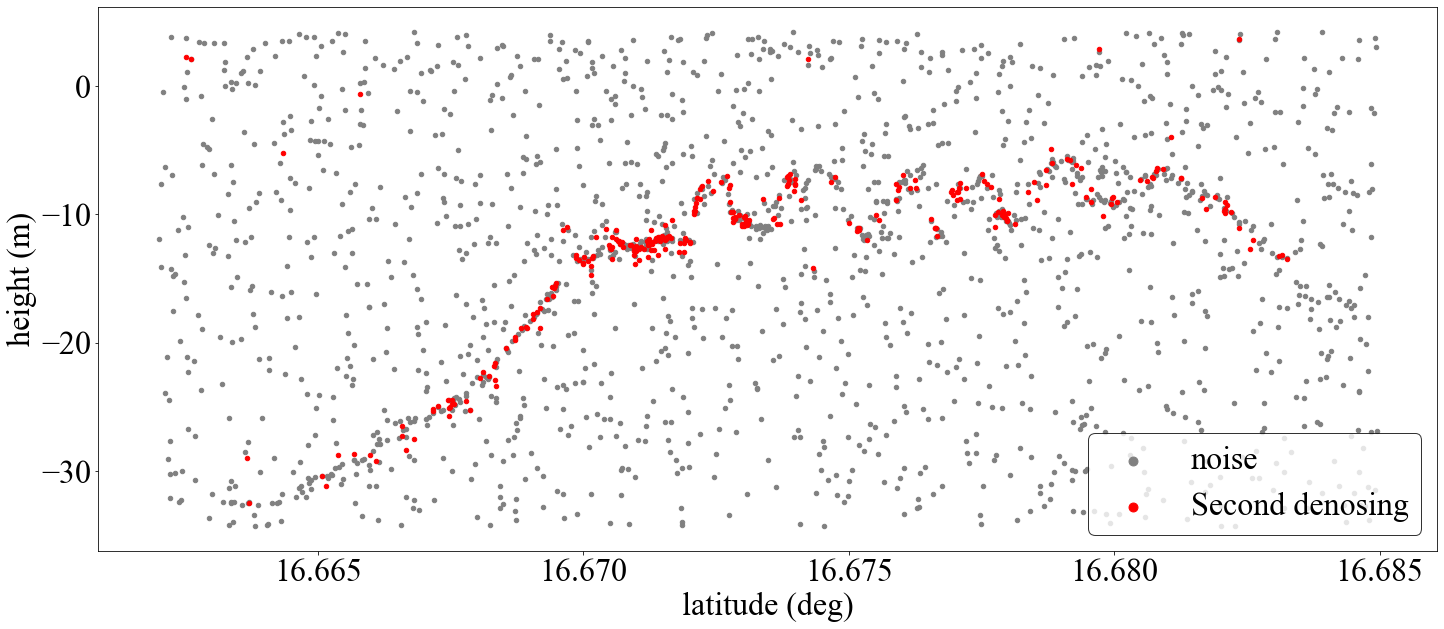

(80, 4) (290, 4)


In [30]:
# a=0.0
# for i in range(len(pro)-1):
#     if a <0.8:
#         a+=pro[i]
# #         print(pro[i])
#         b=n_shuixia2[1][i]
# print(a,b)
yuzhi2=bb
print(yuzhi2)

shuixia_quzao2=[]
shuixia_zaosheng2=[]
shuixia_zaosheng1=list(shuixia_zaosheng1)
for i in range(shuixia_quzao.shape[0]-1):
    if abs(shuixia_quzao[i+1,2]-shuixia_quzao[i,2])<yuzhi2:
        shuixia_quzao2.append(shuixia_quzao[i])
    else:
        shuixia_zaosheng1.append(shuixia_quzao[i])
        shuixia_zaosheng2.append(shuixia_quzao[i])
shuixia_quzao2=np.array(shuixia_quzao2)
shuixia_zaosheng2=np.array(shuixia_zaosheng2)
plt.figure(figsize=(24, 10))
shuixia_zaosheng1=np.array(shuixia_zaosheng1)
plt.scatter(shuixia_zaosheng1[:,0],shuixia_zaosheng1[:,2],20,'gray')
plt.scatter(shuixia_quzao2[:,0],shuixia_quzao2[:,2],20,'r')
plt.xlabel('latitude (deg)',fontsize=32,family='Times New Roman')
plt.ylabel('height (m)',fontsize=32,family='Times New Roman')
plt.xticks(fontsize=32,family='Times New Roman')
plt.yticks(fontsize=32,family='Times New Roman')
plt.legend(['noise','Second denosing'],fontsize=32,markerscale=2,edgecolor='black')
# plt.scatter(shuixia_zaosheng1[:,0],shuixia_zaosheng1[:,2],10)
plt.show()
print(shuixia_zaosheng2.shape,shuixia_quzao2.shape)

In [31]:
# list0=[]
# for i in range(len(n_shuixia2[0])):
#     if n_shuixia2[0][i]>0.1:
#         list0.append(n_shuixia2[1][i])
# yuzhi2=list0[-1]
# list0[-1]

In [32]:
# pro1=np.array(n_shuixia2[0])
# h_cha=np.array(n_shuixia2[1])
# h_cha=h_cha[:pro1.shape[0]]
# plt.scatter(h_cha,pro1,10)
# h_cha_list1=[]
# for i in range(len(pro1)-1):
#     if pro1[i]-pro1[i+1]<0:
#         h_cha_list1.append(h_cha[i])
# #         print(h_cha[i])
# yuzhi2=h_cha_list1[0]
# h_cha_list1[0]

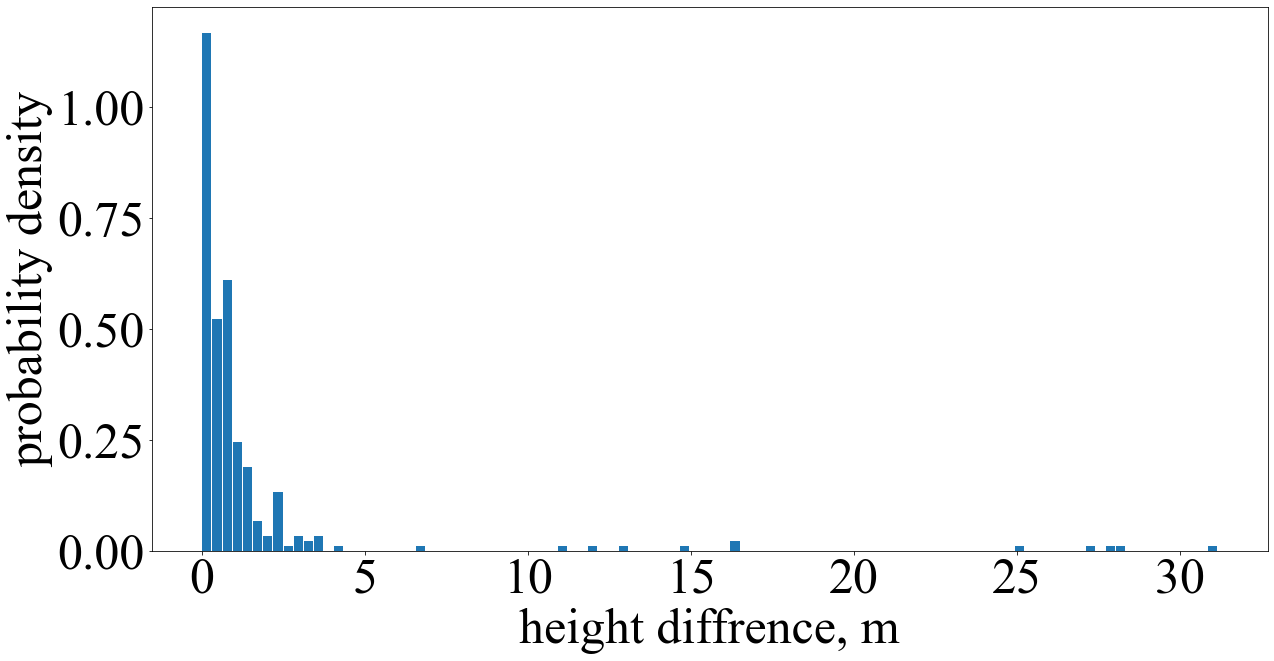

In [33]:
shuixia_3=[]
for i in range(shuixia_quzao2.shape[0]-1):
    a=abs(shuixia_quzao2[i+1,2]-shuixia_quzao2[i,2])
    shuixia_3.append(a)
plt.figure(figsize=(20, 10))
n_shuixia3=plt.hist(shuixia_3,bins=100,rwidth=0.9, density=True)
plt.xlabel('height diffrence, m')
plt.ylabel('probability density')
plt.show()

In [34]:
# pro=n_shuixia3[0]*np.diff(n_shuixia3[1])
# h_cha=np.array(n_shuixia3[1])
# h_cha=h_cha[:pro.shape[0]]
# plt.figure(figsize=(20,10))
# plt.scatter(h_cha,pro,10)
# plt.plot(h_cha,pro,'r')
# plt.vlines(1.3408188499999978,0,0.1)
# plt.show()

[3.50826400e-01 1.50083501e+00 7.19680847e-04]


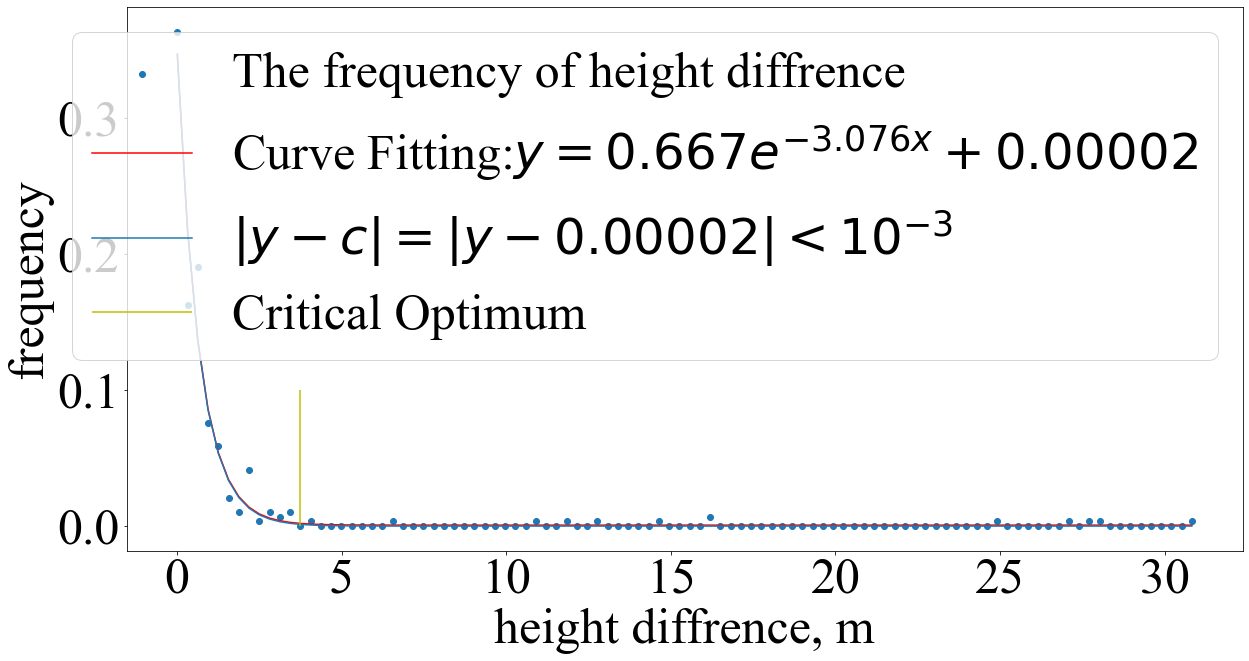

In [35]:
# for i in range(len(pro)-1):
#     print(abs(pro[i+1]-pro[i]))
# 定义xy之间的映射函数
def func(x, a, b, c):
    return a * np.exp(-b*x) + c
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

pro=n_shuixia3[0]*np.diff(n_shuixia3[1])
h_cha=np.array(n_shuixia3[1])
h_cha=h_cha[:pro.shape[0]]
# 声明待拟合的数据
xdata = h_cha
ydata = pro

# 展示数据
plt.figure(figsize=(20,10))
plt.scatter(xdata, ydata, label='data')
# 拟合数据并展示曲线
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt)-popt[2])
print(popt)

# print(func(xdata, *popt)-popt[2])
y2=func(xdata, *popt)-popt[2]
for i in range(len(y2)-1):
    if abs(y2[i]-0)>1e-3:
#         print(xdata[i])
        bb=xdata[i]
plt.vlines(bb,0,0.1,'y')    
plt.xlabel('height diffrence, m')
plt.ylabel('frequency')
plt.legend(['The frequency of height diffrence','Curve Fitting:$y=0.667e^{-3.076x}+0.00002$','$|y-c|=|y-0.00002|<10^{-3}$','Critical Optimum'])
plt.show()

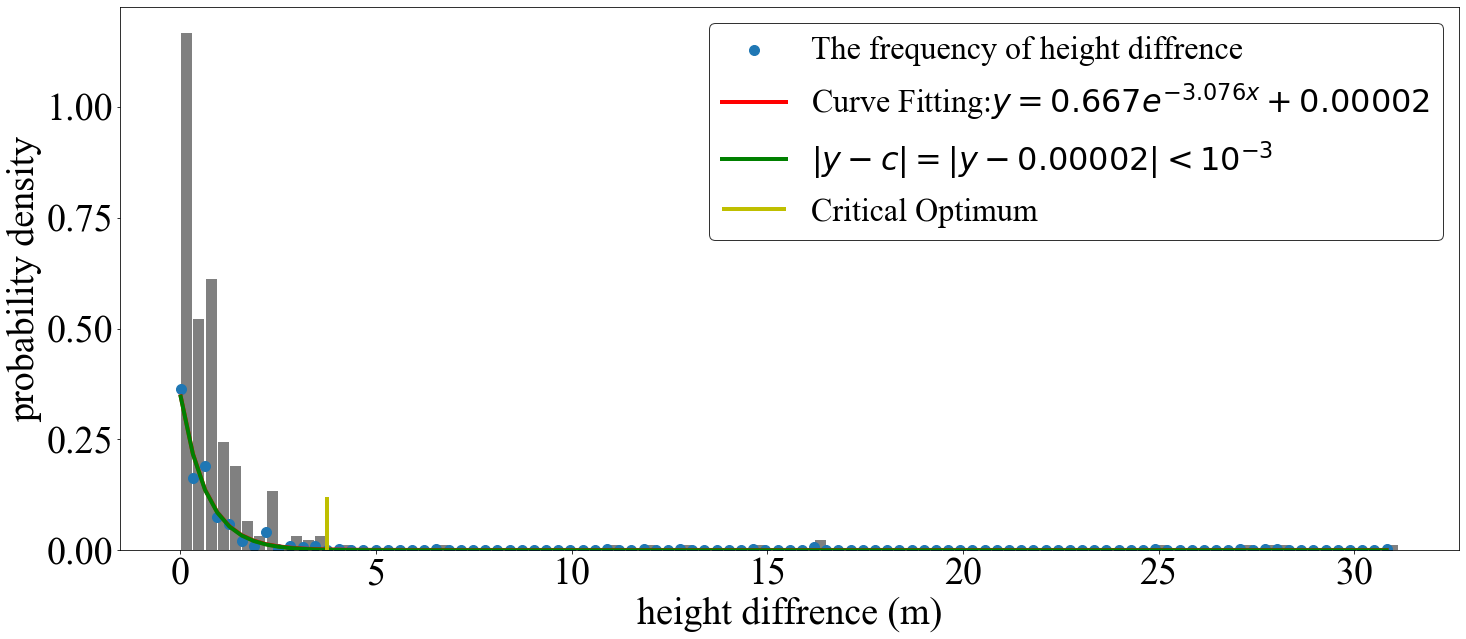

In [36]:
#绘图
plt.figure(figsize=(24, 10))
n_shuixia1=plt.hist(shuixia_3,bins=100,rwidth=0.9,density=True,color='gray')
plt.xlabel('height diffrence (m)',fontsize=38)
plt.ylabel('probability density',fontsize=38)
plt.scatter(xdata, ydata, 100)

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt),linewidth=4)
plt.plot(xdata, func(xdata, *popt)-popt[2],linewidth=4,color='g')
plt.vlines(bb,0,0.12,'y',linewidth=4)    
plt.legend(['The frequency of height diffrence','Curve Fitting:$y=0.667e^{-3.076x}+0.00002$','$|y-c|=|y-0.00002|<10^{-3}$','Critical Optimum'],fontsize=32,markerscale=1,edgecolor='black')
plt.xticks(fontsize=38,family='Times New Roman')
plt.yticks(fontsize=38,family='Times New Roman')

plt.show()

3.7440729400000006


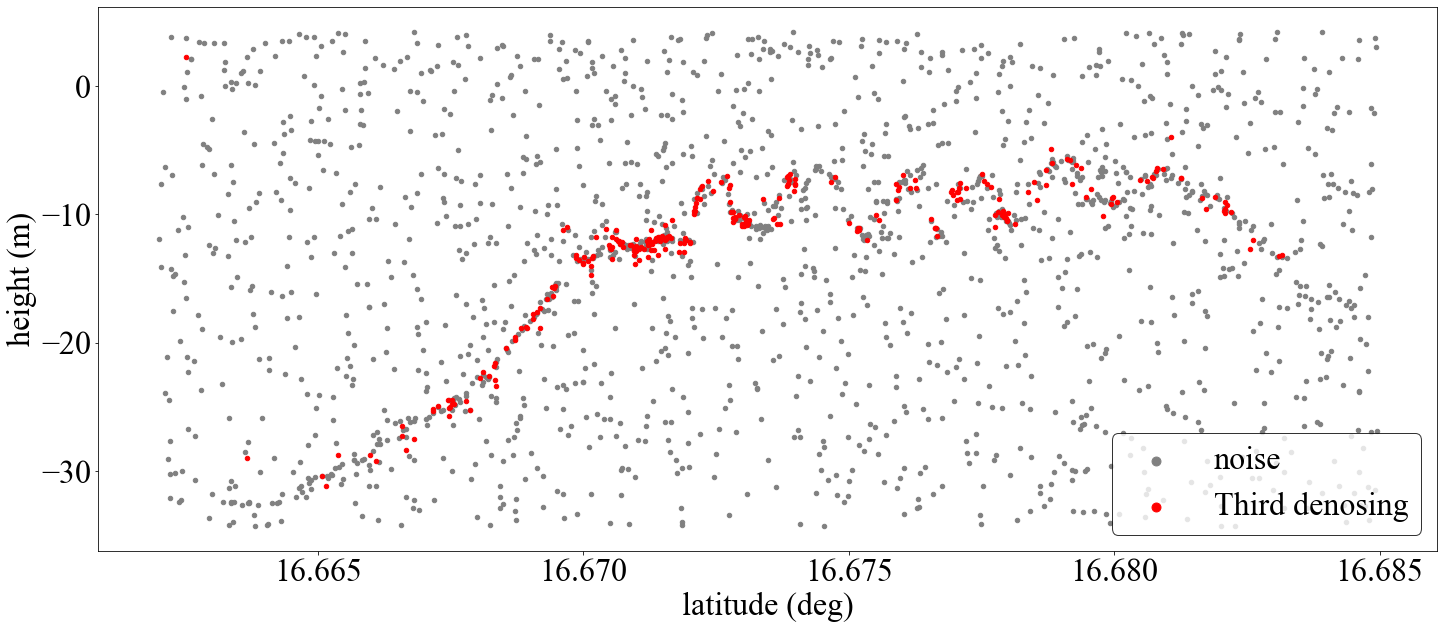

(13, 4) (276, 4)


In [37]:
# a=0.0
# for i in range(len(pro)-1):
#     if a <0.9:
#         a+=pro[i]
# #         print(pro[i])
#         b=n_shuixia3[1][i]
# print(a,b)
yuzhi3=bb
print(yuzhi3)
shuixia_quzao3=[]
shuixia_zaosheng3=[]
shuixia_zaosheng1=list(shuixia_zaosheng1)
for i in range(shuixia_quzao2.shape[0]-1):
    if abs(shuixia_quzao2[i+1,2]-shuixia_quzao2[i,2])<yuzhi3:
        shuixia_quzao3.append(shuixia_quzao2[i])
    else:
        shuixia_zaosheng3.append(shuixia_quzao2[i])
        shuixia_zaosheng1.append(shuixia_quzao2[i])
shuixia_quzao3=np.array(shuixia_quzao3)
shuixia_zaosheng3=np.array(shuixia_zaosheng3)
plt.figure(figsize=(24, 10))
shuixia_zaosheng1=np.array(shuixia_zaosheng1)

plt.scatter(shuixia_zaosheng1[:,0],shuixia_zaosheng1[:,2],20,'gray')
plt.scatter(shuixia_quzao3[:,0],shuixia_quzao3[:,2],20,'r')
plt.xlabel('latitude (deg)',fontsize=32,family='Times New Roman')
plt.ylabel('height (m)',fontsize=32,family='Times New Roman')
plt.xticks(fontsize=32,family='Times New Roman')
plt.yticks(fontsize=32,family='Times New Roman')
plt.legend(['noise','Third denosing'],fontsize=32,markerscale=2,edgecolor='black')
plt.xticks(fontsize=32,family='Times New Roman')
plt.yticks(fontsize=32,family='Times New Roman')
# plt.scatter(shuixia_zaosheng3[:,0],shuixia_zaosheng3[:,2],10)
plt.show()
print(shuixia_zaosheng3.shape,shuixia_quzao3.shape)

In [38]:
# list0=[]
# for i in range(len(n_shuixia3[0])):
#     if n_shuixia3[0][i]>0.1:
#         list0.append(n_shuixia3[1][i])

# yuzhi3=list0[-1]
# list0[-1]

In [39]:
# pro1=np.array(n_shuixia3[0])
# h_cha=np.array(n_shuixia3[1])
# h_cha=h_cha[:pro1.shape[0]]
# plt.scatter(h_cha,pro1,10)
# h_cha_list2=[]
# for i in range(len(pro1)-1):
#     if pro1[i]-pro1[i+1]<0:
#         h_cha_list2.append(h_cha[i])
# #         print(h_cha[i])
# yuzhi3=h_cha_list2[0]
# h_cha_list2[0]

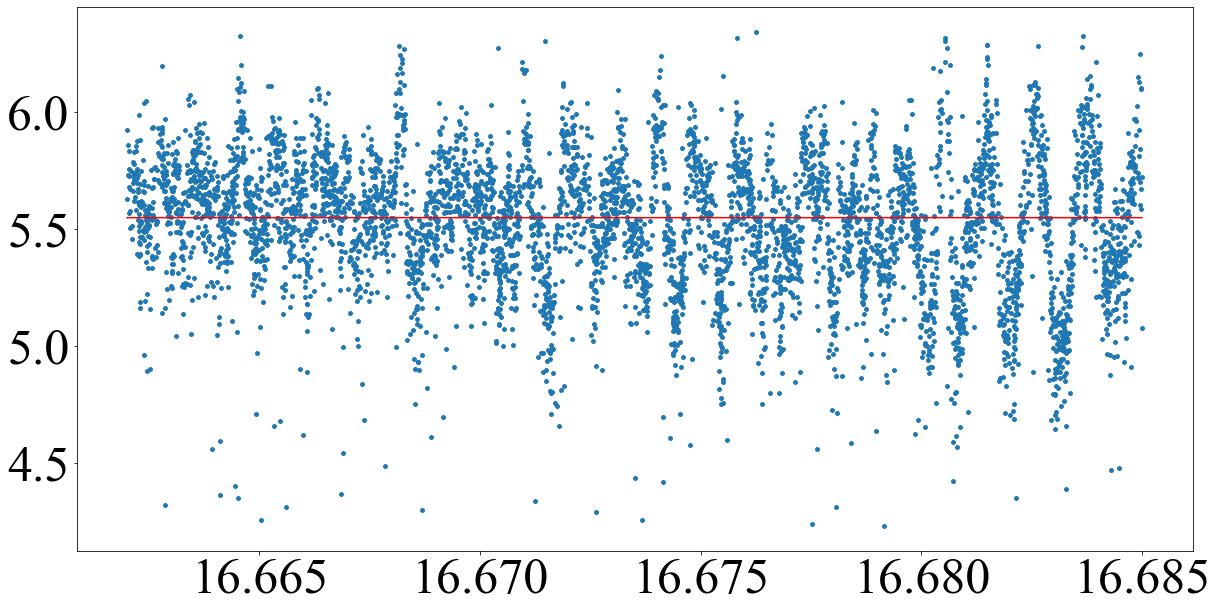

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(data_shuimian[:,0],data_shuimian[:,2],15)
plt.plot(x,y,'r')
plt.show()

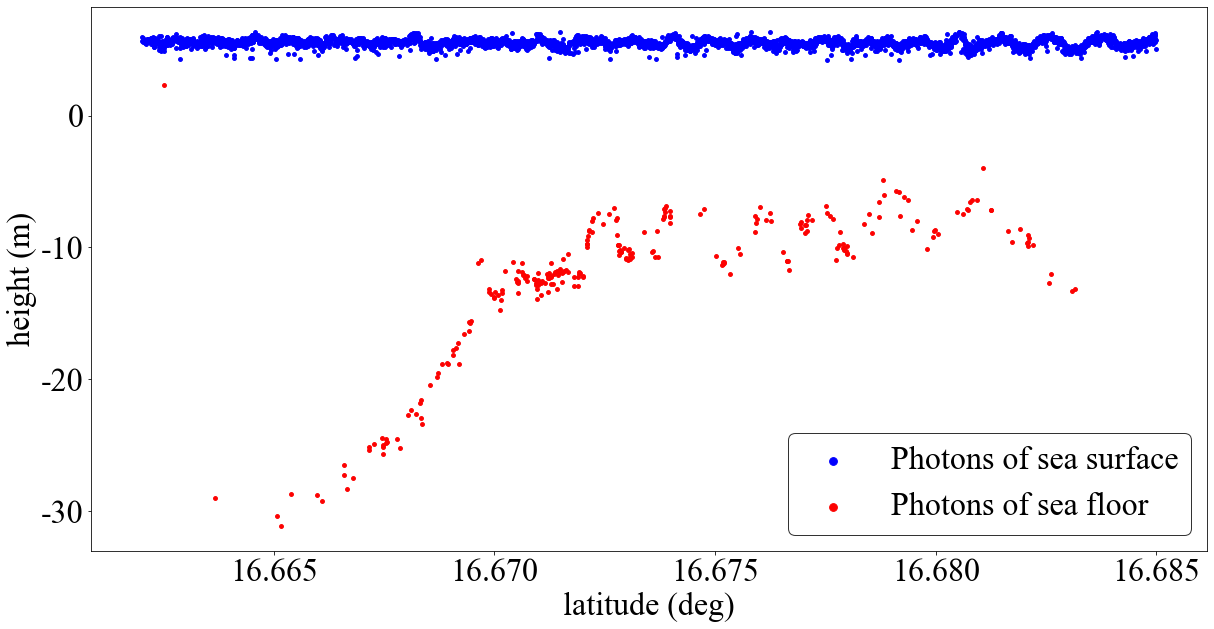

In [41]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = [u'Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 10))

plt.scatter(data_shuimian[:,0],data_shuimian[:,2],15,'#0100FE')

plt.scatter(shuixia_quzao3[:,0],shuixia_quzao3[:,2],15,'#FC0201')

plt.rcParams.update({'font.size':32})
plt.xlabel('latitude (deg)',fontsize=32,family='Times New Roman')
plt.ylabel('height (m)',fontsize=32,family='Times New Roman')

plt.yticks(fontproperties='Times New Roman')
plt.xticks(fontproperties='Times New Roman')
# plt.title('icesat2_classification_data',fontsize=25)
plt.legend(['Photons of sea surface','Photons of sea floor'],fontsize=32,markerscale=2,edgecolor='black')
plt.xticks(fontsize=32,family='Times New Roman')
plt.yticks(fontsize=32,family='Times New Roman')
plt.show()

纬度最小：16.6648
纬度最大：17


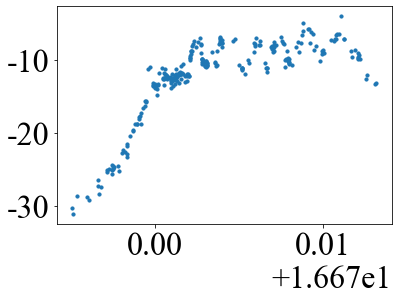

17

In [45]:
shuixia_quzaonew=[]
lat_min=float(input('纬度最小：'))
lat_max=float(input('纬度最大：'))
for i in shuixia_quzao3:
    if lat_min<i[0]<lat_max:
        shuixia_quzaonew.append(i)
shuixia_quzaonew1=np.array(shuixia_quzaonew)
shuixia_quzaonew1.shape

plt.scatter(shuixia_quzaonew1[:,0],shuixia_quzaonew1[:,2],10)
plt.show()
16.6648
17

In [46]:
shuixia_quzao3=shuixia_quzaonew1

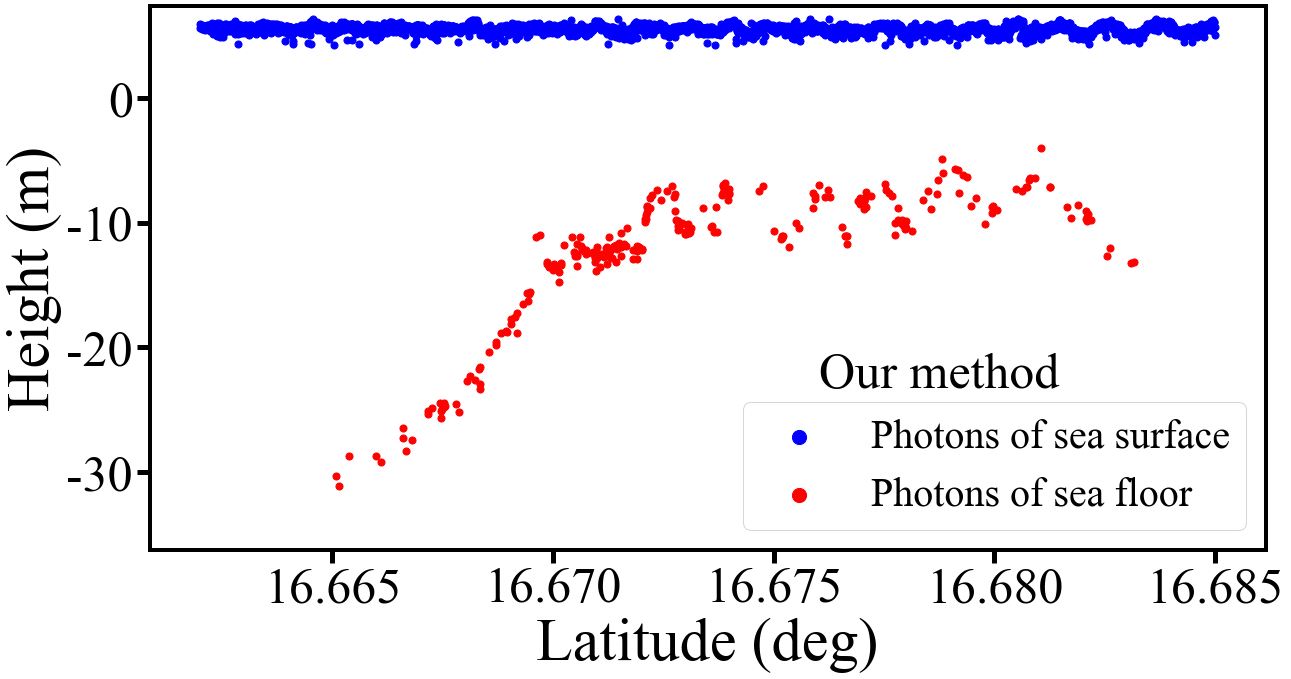

In [51]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = [u'Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 10))

plt.scatter(data_shuimian[:,0],data_shuimian[:,2],50,'#0100FE')

plt.scatter(shuixia_quzao3[:,0],shuixia_quzao3[:,2],50,'#FC0201')

plt.rcParams.update({'font.size':50})
plt.xlabel('Latitude (deg)',fontsize=60,family='Times New Roman')
plt.ylabel('Height (m)',fontsize=60,family='Times New Roman')

plt.yticks(fontproperties='Times New Roman')
plt.xticks(fontproperties='Times New Roman')
# plt.title('icesat2_classification_data',fontsize=25)
plt.legend(['Photons of sea surface','Photons of sea floor'],fontsize=40,markerscale=2)
plt.xticks(fontsize=50,family='Times New Roman')
plt.yticks(fontsize=50,family='Times New Roman')
cu=4
ax1=plt.gca()
ax1.spines['left'].set_linewidth(cu)
ax1.spines['right'].set_linewidth(cu)
ax1.spines['bottom'].set_linewidth(cu)
ax1.spines['top'].set_linewidth(cu)
plt.tick_params(which='major',width=5,length=13)
ax=plt.gca()
plt.text(0.6,0.3,r'Our method',transform=ax.transAxes)
plt.ylim(np.min(data_shuixia[:,2])-2,np.max(data_shuimian[:,2])+1)
plt.show()

In [45]:
# #5.传入去噪后的点，返回折射改正后的结果
# def corrected(out_shuixia_quzao):
#     D=out_shuixia_quzao[:,2]-sea_surface_height
#     Z=out_shuixia_quzao[:,2]-0.25416*D
#     return Z

# Z=corrected(shuixia_quzao3)
# Z=np.array(Z)

In [46]:
# X_123=np.dstack((shuixia_quzao3[:,0],Z,shuixia_quzao3[:,2])).reshape(-1,3)
# X_123.shape

In [47]:
# # 中文和负号的正常显示
# plt.rcParams['font.sans-serif'] = [u'Times New Roman']
# plt.rcParams['axes.unicode_minus'] = False

# plt.figure(figsize=(24, 10))

# plt.scatter(data_shuimian[:,0],data_shuimian[:,2],50,'#0100FE')

# plt.scatter(X_123[:,0],X_123[:,1],50,'cyan')

# plt.scatter(shuixia_quzao3[:,0],shuixia_quzao3[:,2],50,'r')

# plt.xlabel('latitude (deg)',fontsize=50,family='Times New Roman')
# plt.ylabel('height (m)',fontsize=50,family='Times New Roman')

# plt.yticks(fontproperties='Times New Roman',fontsize=50)
# plt.xticks(fontproperties='Times New Roman',fontsize=50)
# plt.legend(['Photons of sea surface','Photons of sea floor corrected','Photons of sea floor'],fontsize=40,markerscale=2,edgecolor='black')
# # filename11=r'D:\桌面\小论文数据\20220726塞班岛\水深数据\\'+filename_111+'.png'
# # plt.savefig(filename11)
# ax=plt.gca()
# # plt.text(0.04,0.8,'(b) Dongdao Island ATL03_20181116',fontsize=40,transform=ax.transAxes)
# plt.show()

In [132]:
# depth=sea_surface_height-Z
# shuishendian=np.dstack((shuixia_quzao3[:,1],shuixia_quzao3[:,0],depth)).reshape(-1,3)
# shuishendian=pd.DataFrame(shuishendian)
# filename1=r'E:\jupyter_workspace\20220727测试\论文20220810\东岛原始ICESat-2数据\\'+filename_111+'东岛.csv'
# shuishendian.to_csv(filename1,header=['lon','lat','h'])

# OPTICS

In [48]:
#3经纬度wgs84转utm
def wgs84_utm(lat,lon):
    from pyproj import  Transformer
    transformer=Transformer.from_crs("epsg:4326", "epsg:32649")
    utm_x, utm_y = transformer.transform(lat,lon)
    return utm_y,utm_x

utm_y,utm_x=wgs84_utm(data[:,0],data[:,1])

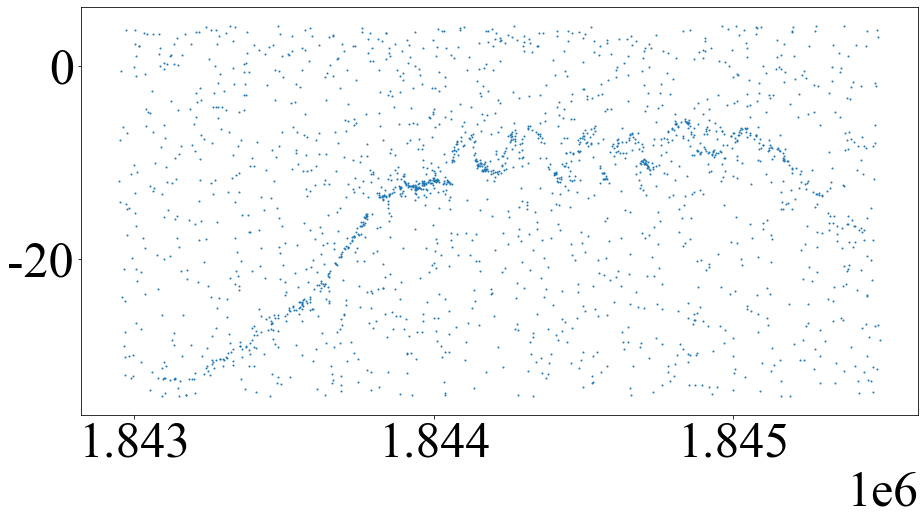

In [49]:
utm_y,utm_x=wgs84_utm(data_shuixia[:,0],data_shuixia[:,1])
plt.figure(figsize=(15,7.5))
plt.scatter(utm_y,data_shuixia[:,2],1)#沿着纬度
plt.show()

In [50]:
#4.OPTICS方法去噪,输入utm坐标系下的纬度和高程，返回cluster_1,该numpy第一个参数是去噪后的纬度，第二个参数是去噪后的经度
def my_optics(utm_y,h,utm_x,lat):
    from sklearn.cluster import OPTICS
    X=np.dstack((utm_y,h)).reshape(-1,2)
    clustering = OPTICS(min_samples=10).fit(X)
    labels=clustering.labels_
    list0=[]#list0用来存储除了label=-1噪音以外的聚类点
    n_clusters_=len(set(labels))-(1 if -1 in labels else 0)#计算分出来的类别数，后面的if语句是指当存在-1也就是噪音的时候就-1，不算做分类的类别
    
    X1=np.dstack((utm_y,h,utm_x,lat)).reshape(-1,4)#用来把经纬度高程都通过标记为-1的噪音去除的结果
    for i in range(n_clusters_):#对除了-1的噪音点以外的所有其他标签点进行循环，从labels=0开始，到labels=n_clusters循环结束
    #     print(np.array(X[labels == i]))
        list1=list(np.array(X1[labels == i]))#将lables=i的点存入list1,为什么要用list把numpy转成list呢？答：因为要用到list的列表合并方法list0.extend
    #     print(list1)
        list0.extend(list1)#将提取的各个类别存入list0

    cluster_1=np.array(list0)#为什么要把list0再转成numpy呢？答：因为list里面存的numpy array不好提取显示，转成numpy就可以按照列进行访问了
    return cluster_1

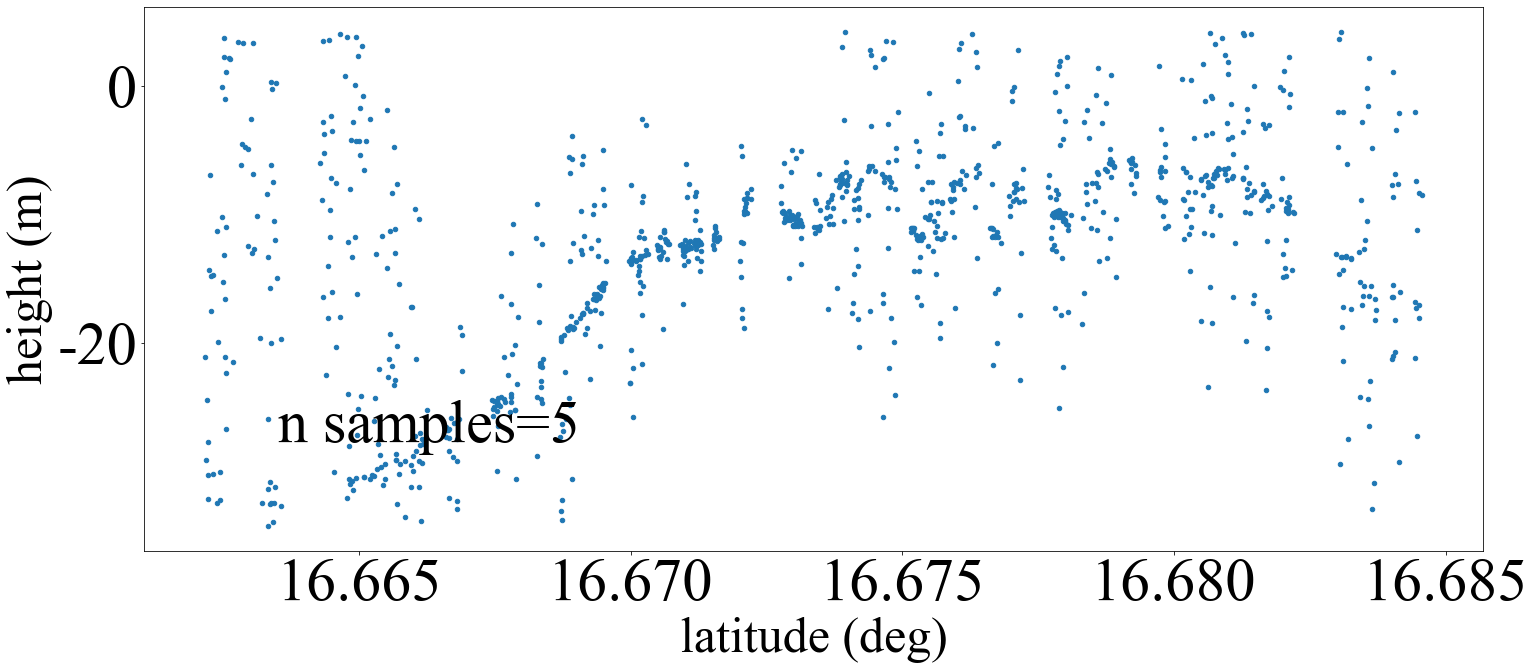

In [51]:
optics_cluster=my_optics(utm_y,data_shuixia[:,2],utm_x,data_shuixia[:,0])#传入纬度，高程，经度
plt.figure(figsize=(24,10))
plt.scatter(optics_cluster[:,3],optics_cluster[:,1],20)#绘制去除labels=-1噪音以外的所有信号点，当，min_samples=4时效果最好
plt.rcParams.update({'font.size':60})
plt.xlabel('latitude (deg)',family='Times New Roman')
plt.ylabel('height (m)',family='Times New Roman')
ax=plt.gca()
plt.yticks(fontproperties='Times New Roman')
plt.xticks(fontproperties='Times New Roman')
plt.text(0.1,0.2,r'n samples=5',transform=ax.transAxes)
plt.show()

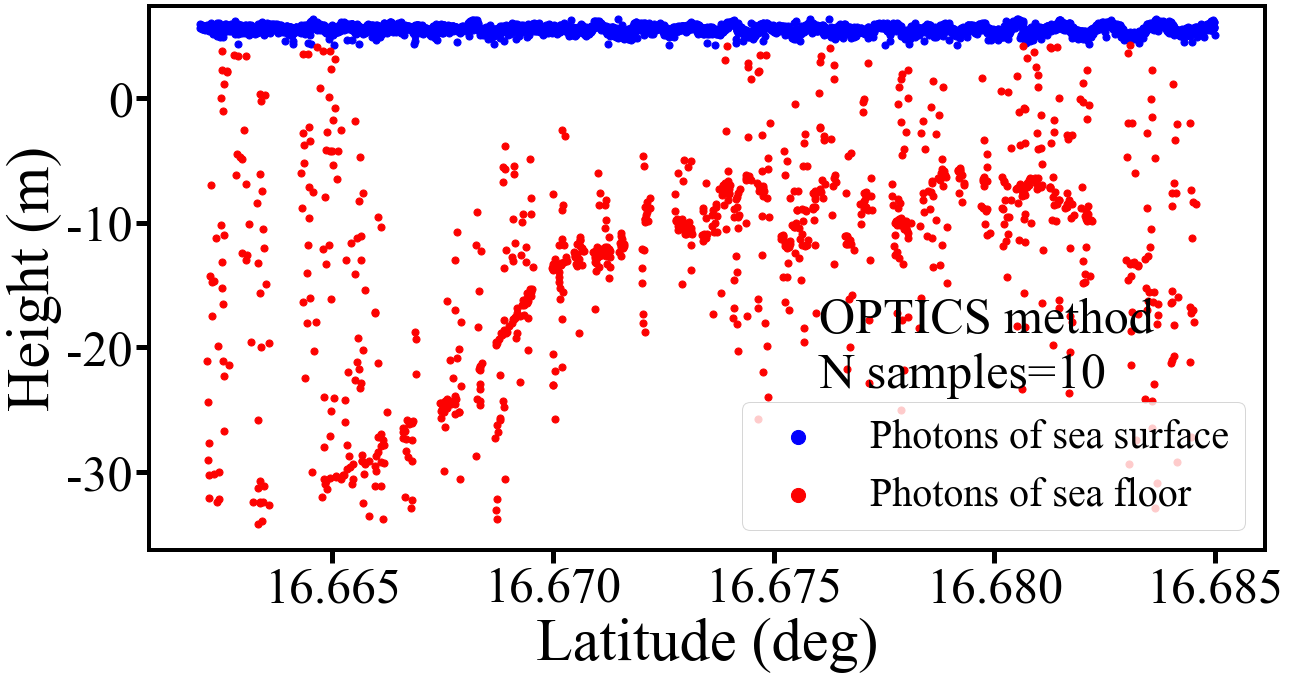

In [64]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = [u'Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 10))

plt.scatter(data_shuimian[:,0],data_shuimian[:,2],50,'#0100FE')

plt.scatter(optics_cluster[:,3],optics_cluster[:,1],50,'#FC0201')

plt.rcParams.update({'font.size':50})
plt.xlabel('Latitude (deg)',fontsize=60,family='Times New Roman')
plt.ylabel('Height (m)',fontsize=60,family='Times New Roman')

plt.yticks(fontproperties='Times New Roman')
plt.xticks(fontproperties='Times New Roman')

# plt.title('icesat2_classification_data',fontsize=25)
plt.legend(['Photons of sea surface','Photons of sea floor'],fontsize=40,markerscale=2)
plt.xticks(fontsize=50,family='Times New Roman')
plt.yticks(fontsize=50,family='Times New Roman')
ax1=plt.gca()
ax1.spines['left'].set_linewidth(cu)
ax1.spines['right'].set_linewidth(cu)
ax1.spines['bottom'].set_linewidth(cu)
ax1.spines['top'].set_linewidth(cu)
plt.tick_params(which='major',width=5,length=13)
ax=plt.gca()
plt.text(0.6,0.4,r'OPTICS method',transform=ax.transAxes)
plt.text(0.6,0.3,r'N samples=10',transform=ax.transAxes)
plt.ylim(np.min(data_shuixia[:,2])-2,np.max(data_shuimian[:,2])+1)
plt.show()

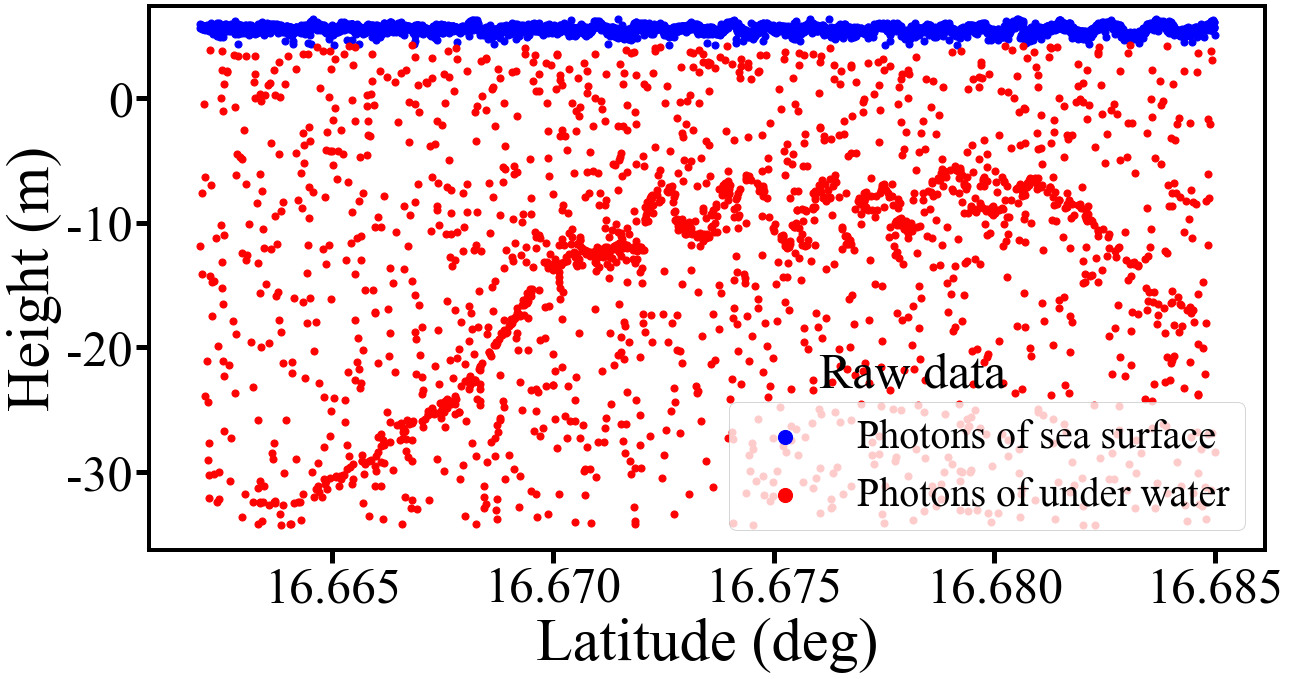

In [58]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = [u'Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 10))

plt.scatter(data_shuimian[:,0],data_shuimian[:,2],50,'#0100FE')

plt.scatter(data_shuixia[:,0],data_shuixia[:,2],50,'#FC0201')

plt.rcParams.update({'font.size':50})
plt.xlabel('Latitude (deg)',fontsize=60,family='Times New Roman')
plt.ylabel('Height (m)',fontsize=60,family='Times New Roman')

plt.yticks(fontproperties='Times New Roman')
plt.xticks(fontproperties='Times New Roman')

# plt.title('icesat2_classification_data',fontsize=25)
plt.legend(['Photons of sea surface','Photons of under water'],fontsize=40,markerscale=2)
plt.xticks(fontsize=50,family='Times New Roman')
plt.yticks(fontsize=50,family='Times New Roman')
ax1=plt.gca()
ax1.spines['left'].set_linewidth(cu)
ax1.spines['right'].set_linewidth(cu)
ax1.spines['bottom'].set_linewidth(cu)
ax1.spines['top'].set_linewidth(cu)
plt.tick_params(which='major',width=5,length=13)
# plt.text(0.01,0.4,r'n samples=3',transform=ax.transAxes)
ax=plt.gca()
plt.text(0.6,0.3,r'Raw data',transform=ax.transAxes)
plt.ylim(np.min(data_shuixia[:,2])-2,np.max(data_shuimian[:,2])+1)
plt.show()

# DBSCAN

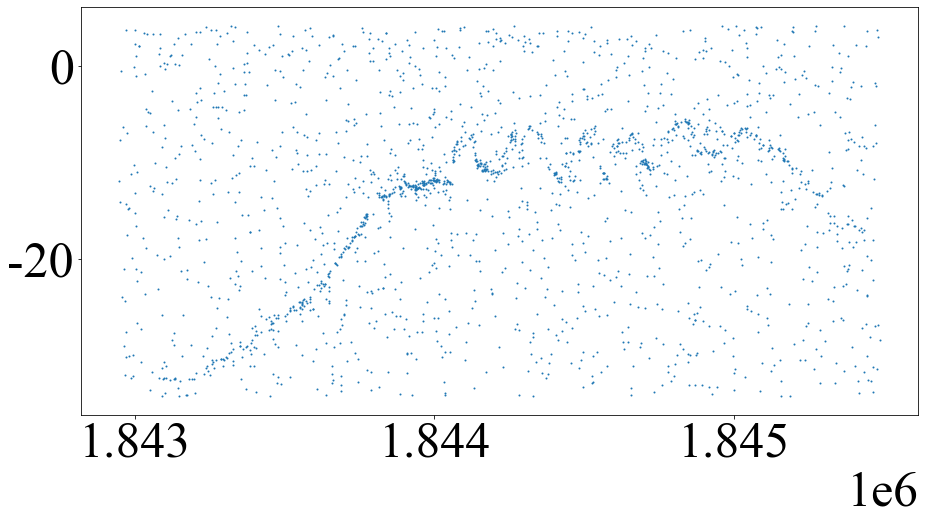

In [49]:
#3经纬度wgs84转utm
def wgs84_utm(lat,lon):
    from pyproj import  Transformer
    transformer=Transformer.from_crs("epsg:4326", "epsg:32649")
    utm_x, utm_y = transformer.transform(lat,lon)
    return utm_y,utm_x

utm_y,utm_x=wgs84_utm(data_shuixia[:,0],data_shuixia[:,1])
plt.figure(figsize=(15,7.5))
plt.scatter(utm_y,data_shuixia[:,2],1)#沿着纬度
plt.show()

#4.OPTICS方法去噪,输入utm坐标系下的纬度和高程，返回cluster_1,该numpy第一个参数是去噪后的纬度，第二个参数是去噪后的经度
def my_dbscan(utm_y,h,utm_x,lat):
    from sklearn.cluster import DBSCAN
    X=np.dstack((utm_y,h)).reshape(-1,2)
    clustering = DBSCAN(eps=1.5,min_samples=3).fit(X)
    labels=clustering.labels_
    list0=[]#list0用来存储除了label=-1噪音以外的聚类点
    n_clusters_=len(set(labels))-(1 if -1 in labels else 0)#计算分出来的类别数，后面的if语句是指当存在-1也就是噪音的时候就-1，不算做分类的类别
    
    X1=np.dstack((utm_y,h,utm_x,lat)).reshape(-1,4)#用来把经纬度高程都通过标记为-1的噪音去除的结果
    for i in range(n_clusters_):#对除了-1的噪音点以外的所有其他标签点进行循环，从labels=0开始，到labels=n_clusters循环结束
    #     print(np.array(X[labels == i]))
        list1=list(np.array(X1[labels == i]))#将lables=i的点存入list1,为什么要用list把numpy转成list呢？答：因为要用到list的列表合并方法list0.extend
    #     print(list1)
        list0.extend(list1)#将提取的各个类别存入list0

    cluster_1=np.array(list0)#为什么要把list0再转成numpy呢？答：因为list里面存的numpy array不好提取显示，转成numpy就可以按照列进行访问了
    return cluster_1



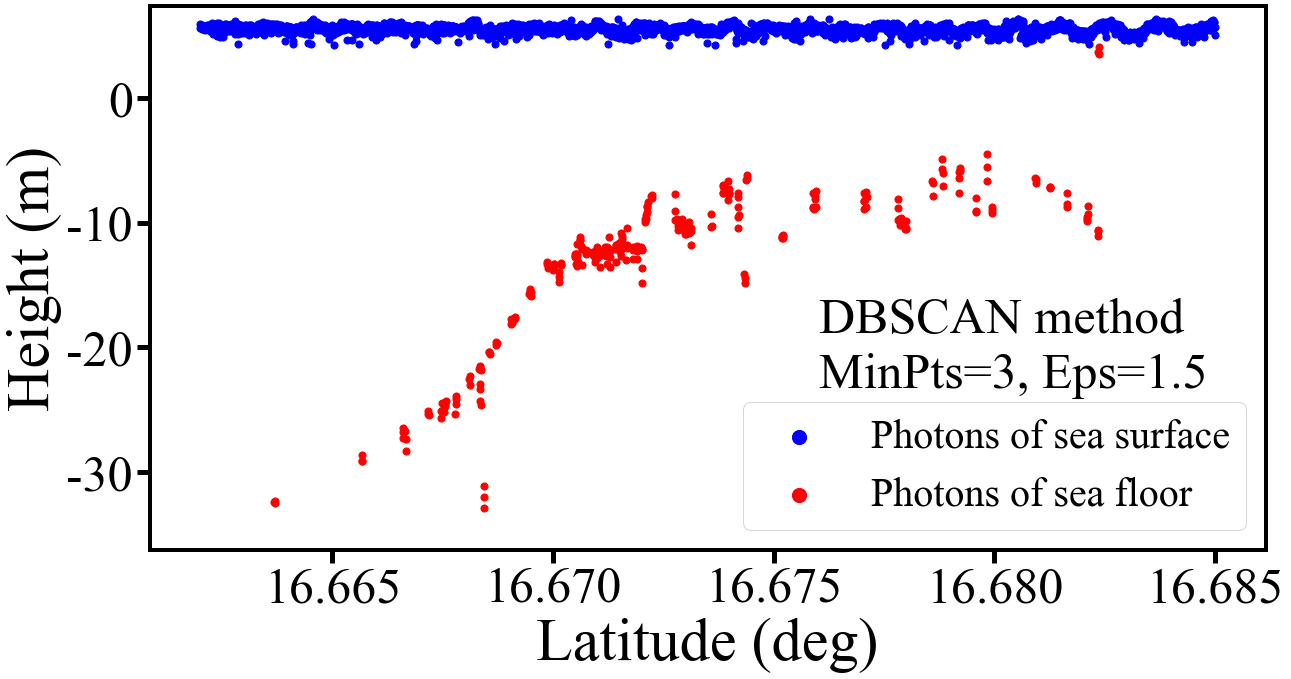

In [50]:
dbscan_cluster=my_dbscan(utm_y,data_shuixia[:,2],utm_x,data_shuixia[:,0])#传入纬度，高程，经度
    # 中文和负号的正常显示
    
    

plt.rcParams['font.sans-serif'] = [u'Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 10))

plt.scatter(data_shuimian[:,0],data_shuimian[:,2],50,'#0100FE')

plt.scatter(dbscan_cluster[:,3],dbscan_cluster[:,1],50,'#FC0201')

plt.rcParams.update({'font.size':50})
plt.xlabel('Latitude (deg)',fontsize=60,family='Times New Roman')
plt.ylabel('Height (m)',fontsize=60,family='Times New Roman')

plt.yticks(fontproperties='Times New Roman')
plt.xticks(fontproperties='Times New Roman')

# plt.title('icesat2_classification_data',fontsize=25)
plt.legend(['Photons of sea surface','Photons of sea floor'],fontsize=40,markerscale=2)
plt.xticks(fontsize=50,family='Times New Roman')
plt.yticks(fontsize=50,family='Times New Roman')
cu=4
ax1=plt.gca()
ax1.spines['left'].set_linewidth(cu)
ax1.spines['right'].set_linewidth(cu)
ax1.spines['bottom'].set_linewidth(cu)
ax1.spines['top'].set_linewidth(cu)
plt.tick_params(which='major',width=5,length=13)
ax=plt.gca()
plt.text(0.6,0.4,r'DBSCAN method',transform=ax.transAxes)
plt.text(0.6,0.3,r'MinPts=3, Eps=1.5',transform=ax.transAxes)
plt.ylim(np.min(data_shuixia[:,2])-2,np.max(data_shuimian[:,2])+1)

plt.show()